# **Project Name**    -Unsupervised ML - Netflix Movies and TV Shows Clustering



##### **Project Type**    - EDA/Unsupervised
##### **Contribution**    - Individual
##### **Name -** Ankita Sharma


# **Project Summary -**

This project applies unsupervised machine learning techniques to analyze and cluster Netflix movies and TV shows based on their content characteristics in order to uncover meaningful structure within the catalog. The dataset contains metadata such as **title, type, description, genre, cast, director, country, rating, and release year**, and was first explored through detailed **EDA** to understand content distribution, genre dominance, country-wise production patterns, rating trends, and temporal behavior. After careful data cleaning, textual attributes including description, genres, cast, and director were combined into a unified text feature and processed using a comprehensive NLP pipeline involving **contraction expansion, lowercasing, noise removal, stopword elimination, and lemmatization** . The cleaned text was vectorized using **TF-IDF** and reduced using **TruncatedSVD** to capture latent semantic structure while handling sparsity efficiently. Multiple clustering algorithms were evaluated, including **KMeans, Hierarchical clustering, and DBSCAN**, with KMeans selected as the final model based on silhouette analysis and interpretability. The resulting clusters revealed clear and meaningful segmentation of Netflix content, such as **mainstream international movies, serialized TV content, stand-up comedy, and East-Asian television**, demonstrating a robust and well-justified application of unsupervised learning to large-scale text data.

# **GitHub Link -**

https://github.com/AnkitaSharma0502/Netflix-Movies-and-TV-Shows-Clustering

# **Problem Statement**


**Business Context**

Netflix is one of the world’s largest streaming platforms, offering a wide variety of movies and TV shows across different countries and genres. Over the past decade, the streaming industry has undergone a significant transformation, with platforms shifting their focus from traditional movies to episodic and long-form television content.

The dataset used in this project contains information about TV shows and movies available on Netflix as of 2019. It is sourced from Flixable, a third-party Netflix search engine. Industry reports indicate that while the number of movies on Netflix has decreased since 2010, the number of TV shows has nearly tripled during the same period. This suggests a strategic shift in Netflix’s content acquisition and production approach.

Understanding these trends and content patterns is important for:

Analyzing Netflix’s evolving content strategy

Identifying regional content preferences

Grouping similar content for better user experience and personalization

This project uses data analysis and unsupervised machine learning techniques to explore and uncover meaningful insights from Netflix’s content catalog.

**Problem Statement**

The goal of this project is to analyze Netflix’s catalog of movies and TV shows to understand content trends, regional distribution patterns, and to identify natural groupings of similar content using clustering techniques.

By exploring the dataset and applying text-based clustering, we aim to answer questions such as:

What type of content is available in different countries?

Has Netflix increasingly focused on TV shows rather than movies in recent years?

Can similar movies and TV shows be grouped together based on their descriptions and metadata?

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Text processing
!pip install contractions
import contractions
import string
import nltk
from nltk.corpus import stopwords

# Vectorization & modeling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

# WordCloud
from wordcloud import WordCloud, STOPWORDS


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Download wordnet,stopwords for NLP
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt_tab') #tokenization



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 5.6 MB/s eta 0:00:00


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print("rows:",len(df))
print("columns:",len(df.columns))

rows: 7787
columns: 12


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sort_values(ascending = False)

,0
0,False
5171,False
5199,False
5198,False
5197,False
...,...
2591,False
2590,False
2589,False
2588,False


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


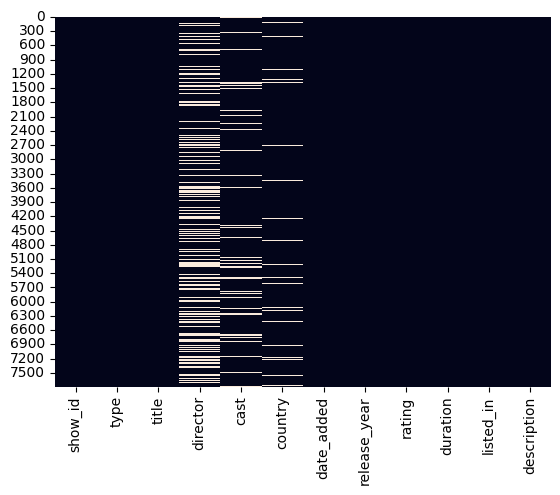

In [9]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [10]:
# Missing value percentage
missing_percentage = (df.isnull().sum() / len(df) * 100).round(2)
print("\n Missing Values Percentage (%):")
display(missing_percentage)


 Missing Values Percentage (%):


,0
show_id,0.00
type,0.00
title,0.00
director,30.68
cast,9.22
country,6.51
date_added,0.13
release_year,0.00
rating,0.09
duration,0.00


### What did you know about your dataset?

The Netflix dataset contains information about TV Shows and Movies available on the platform as of 2019.  
It includes **7787 rows** and **12 columns**, where each row represents a unique title.

###  Key Observations:
- The dataset contains details like title, cast, director, rating, genre, country, release year, and description.
- Most columns contain **textual information**, useful for NLP-based clustering.
- **director**, **cast**, and **country** have the highest number of missing values.
- **date_added** and **rating** have very few missing values.
- Since this is a text-heavy dataset, dropping rows aggressively may remove important titles.
- There are **no duplicate rows**, so dataset uniqueness is intact.
- The `release_year` column is the only numerical column.


## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0


In [13]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,7787,7787,s7787,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,7787,2,Movie,5377,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,7787,7787,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,5398,4049,"Raúl Campos, Jan Suter",18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7069,6831,David Attenborough,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7280,681,United States,2555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,7777,1565,"January 1, 2020",118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,7787.0,NaN,NaN,NaN,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0
rating,7780,14,TV-MA,2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,7787,216,1 Season,1608,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Variables Description

## 📑 Variables Description

| Variable     | Type                   | Description                                                                                             |
|-------------|------------------------|---------------------------------------------------------------------------------------------------------|
| show_id     | Object       | Unique identifier for each Netflix title (movie or TV show)                                  |
| type        | Object  | Indicates whether the title is a Movie or a TV Show.                                  |
| title       | Object         | Name of the movie or TV show as it appears on Netflix.                                |
| director    | Object       | Director(s) of the title; can be blank or contain multiple names separated by commas.       |
| cast        | Object        | Main actors/actresses in the title, usually a comma‑separated list of names.           |
| country     | Object      | Country or countries where the title was produced; often multiple, separated by commas. |
| date_added  | Object               | Date when the title was added to Netflix’s catalog.                                 |
| release_year| Integer                | Year when the title was originally released, not when it was added to Netflix.       |
| rating      | Object     | Age‑based content rating (e.g., TV‑MA, TV‑14, PG, R) indicating audience maturity.     |
| duration    | Object         | For movies: runtime in minutes (e.g., “90 min”); for TV shows: number of seasons (e.g., “2 Seasons”).  |
| listed_in   | Object        | Genres/categories assigned to the title, such as “Dramas”, “Comedies”, “International Movies”.  |
| description | Object  | Short synopsis or summary describing the title’s content or plot.                    |


### Check Unique Values for each variable.

In [14]:
# Check count of Unique Values for each variable.
for i in df.columns.tolist():
  print(i,":  ",df[i].nunique())

show_id :   7787
type :   2
title :   7787
director :   4049
cast :   6831
country :   681
date_added :   1565
release_year :   73
rating :   14
duration :   216
listed_in :   492
description :   7769


In [15]:
#Check Unique Values for each variable.
print(df.apply(lambda i:i.unique()))

show_id         [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...
type                                             [TV Show, Movie]
title           [3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19...
director        [nan, Jorge Michel Grau, Gilbert Chan, Shane A...
cast            [João Miguel, Bianca Comparato, Michel Gomes, ...
country         [Brazil, Mexico, Singapore, United States, Tur...
date_added      [August 14, 2020, December 23, 2016, December ...
release_year    [2020, 2016, 2011, 2009, 2008, 2019, 1997, 201...
rating          [TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y...
duration        [4 Seasons, 93 min, 78 min, 80 min, 123 min, 1...
listed_in       [International TV Shows, TV Dramas, TV Sci-Fi ...
description     [In a future where the elite inhabit an island...
dtype: object


## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.

# Fill director and cast with 'Unknown'
df[['director', 'cast']] = df[['director', 'cast']].fillna('Unknown')

# Fill country with mode
df['country'] = df['country'].fillna(df['country'].mode()[0])

# Drop remaining nulls (date_added, rating)
df.dropna(subset=['date_added', 'rating'], inplace=True)




In [17]:
# Again cheking null values
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [18]:
#Unnest Director
df_director = df[['title', 'director']].copy()
df_director['director'] = df_director['director'].apply(lambda x: str(x).split(', '))
df_director = df_director.explode('director').reset_index(drop=True)
df_director = df_director.rename(columns={'director': 'Directors'})

In [19]:
#Unnest Cast
df_cast = df[['title', 'cast']].copy()
df_cast['cast'] = df_cast['cast'].apply(lambda x: str(x).split(', '))
df_cast = df_cast.explode('cast').reset_index(drop=True)
df_cast = df_cast.rename(columns={'cast': 'Actors'})

In [20]:
#Unnest Genre
df_genre = df[['title', 'listed_in']].copy()
df_genre['listed_in'] = df_genre['listed_in'].apply(lambda x: str(x).split(', '))
df_genre = df_genre.explode('listed_in').reset_index(drop=True)
df_genre = df_genre.rename(columns={'listed_in': 'Genre'})


In [21]:
#Unnest Country
df_country = df[['title', 'country']].copy()
df_country['country'] = df_country['country'].apply(lambda x: str(x).split(', '))
df_country = df_country.explode('country').reset_index(drop=True)
df_country = df_country.rename(columns={'country': 'Country'})

In [22]:
#Merge unchanged

df_merge1 = df_cast.merge(df_director, on='title', how='inner')
df_merge2 = df_merge1.merge(df_genre, on='title', how='inner')
df_merge3 = df_merge2.merge(df_country, on='title', how='inner')

df_final = df_merge3.merge(
    df[['type', 'title', 'date_added', 'release_year', 'rating', 'duration', 'description']],
    on='title',
    how='left'
)


In [23]:
df_final.head(10)

,title,Actors,Directors,Genre,Country,type,date_added,release_year,rating,duration,description
0,3%,João Miguel,Unknown,International TV Shows,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
1,3%,João Miguel,Unknown,TV Dramas,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
2,3%,João Miguel,Unknown,TV Sci-Fi & Fantasy,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
3,3%,Bianca Comparato,Unknown,International TV Shows,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
4,3%,Bianca Comparato,Unknown,TV Dramas,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
5,3%,Bianca Comparato,Unknown,TV Sci-Fi & Fantasy,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
6,3%,Michel Gomes,Unknown,International TV Shows,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
7,3%,Michel Gomes,Unknown,TV Dramas,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
8,3%,Michel Gomes,Unknown,TV Sci-Fi & Fantasy,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
9,3%,Rodolfo Valente,Unknown,International TV Shows,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...


In [24]:
df_final.shape

(175807, 11)

The dataset expanded significantly after unnesting because each title can have multiple actors, genres, and countries. This one-to-many expansion is intentional for granular analysis.

In [25]:
#Duration handeling

def extract_number(val):
    try:
        return int(str(val).split()[0])
    except:
        return np.nan


df_final['duration_minutes'] = df_final.apply(
    lambda x: extract_number(x['duration']) if x['type'] == 'Movie' else np.nan,
    axis=1
)


df_final['duration_seasons'] = df_final.apply(
    lambda x: extract_number(x['duration']) if x['type'] == 'TV Show' else np.nan,
    axis=1
)
df_final.drop('duration', axis=1, inplace=True)



In [26]:
#after sepearation
df_final[['type','duration_minutes','duration_seasons']].head()

,type,duration_minutes,duration_seasons
0,TV Show,NaN,4.0
1,TV Show,NaN,4.0
2,TV Show,NaN,4.0
3,TV Show,NaN,4.0
4,TV Show,NaN,4.0


Movies → duration in minutes

TV Shows → duration in seasons

They are kept separate to avoid semantic mixing

In [27]:
#converting date added to datetime
df_final['date_added'] = pd.to_datetime(df_final['date_added'], errors='coerce')
df_final['day_added'] = df_final['date_added'].dt.day.astype('Int64')
df_final['month_added'] = df_final['date_added'].dt.month.astype('Int64')
df_final['year_added'] = df_final['date_added'].dt.year.astype('Int64')
df_final=df_final[df_final['year_added'].notna()]
df_final=df_final[df_final['year_added']>0]

In [28]:
#drop date_added column
df_final.drop('date_added', axis=1, inplace=True)

#cross cheking
df_final[['day_added','month_added','year_added']].head()


,day_added,month_added,year_added
0,14,8,2020
1,14,8,2020
2,14,8,2020
3,14,8,2020
4,14,8,2020


In [29]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174219 entries, 0 to 175806
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   title             174219 non-null  object 
 1   Actors            174219 non-null  object 
 2   Directors         174219 non-null  object 
 3   Genre             174219 non-null  object 
 4   Country           174219 non-null  object 
 5   type              174219 non-null  object 
 6   release_year      174219 non-null  int64  
 7   rating            174219 non-null  object 
 8   description       174219 non-null  object 
 9   duration_minutes  126079 non-null  float64
 10  duration_seasons  48140 non-null   float64
 11  day_added         174219 non-null  Int64  
 12  month_added       174219 non-null  Int64  
 13  year_added        174219 non-null  Int64  
dtypes: Int64(3), float64(2), int64(1), object(8)
memory usage: 20.4+ MB


In [30]:

#Rating Binning
rating_map = {
    'TV-MA': 'Adult Content',
    'NC-17': 'Adult Content',
    'R': 'Adult Content',

    'PG-13': 'Teen Content',
    'TV-14': 'Teen Content',

    'TV-PG': 'Children Content',
    'PG': 'Children Content',
    'TV-G': 'Children Content',
    'G': 'Children Content',

    'TV-Y': 'Family-friendly Content',
    'TV-Y7': 'Family-friendly Content',
    'TV-Y7-FV': 'Family-friendly Content',

    'NR': 'Not Rated',
    'UR': 'Not Rated'
}

df_final['rating'] = df_final['rating'].replace(rating_map)


In [31]:
#values ater binning
df_final['rating'].value_counts()


,count
rating,
Adult Content,85544
Teen Content,51986
Children Content,26382
Family-friendly Content,8489
Not Rated,1818


To reduce category sparsity and make clusters more semantically meaningful.

In [32]:
#seperating movies and show as different column
df_movies = df_final[df_final['type'] == 'Movie']
df_tvshows = df_final[df_final['type'] == 'TV Show']

print("Movies shape:", df_movies.shape)
print("TV Shows shape:", df_tvshows.shape)


Movies shape: (126079, 14)
TV Shows shape: (48140, 14)


In [33]:
df_final.isnull().sum()


,0
title,0
Actors,0
Directors,0
Genre,0
Country,0
type,0
release_year,0
rating,0
description,0
duration_minutes,48140


In [34]:
df_final.shape

(174219, 14)

### What all manipulations have you done and insights you found?

To prepare the dataset for EDA and clustering, the following transformations were applied:

### Handling Missing Values

The dataset contains missing values in the following columns:
- `director`
- `cast`
- `country`
- `date_added`
- `rating`

The following strategies were applied:

- **director, cast**: These are descriptive text fields. Since the actual values cannot be inferred, missing entries were replaced with the placeholder `"Unknown"`.
- **country**: Missing values were filled using the mode (most frequent country) to preserve distribution.
- **date_added, rating**: These had very few missing values. The corresponding rows were dropped to avoid introducing noise.

This approach ensures minimal data loss while maintaining semantic integrity.


### Unnesting Nested Columns

Several columns contain multiple values in a single cell separated by commas. These include:
- `director`
- `cast`
- `listed_in` (Genre)
- `country`

To make the data suitable for analysis and clustering, each of these columns was split and exploded so that every row represents a single atomic value.

For example:
- `"Actor1, Actor2, Actor3"` becomes three separate rows.
- `"Drama, International Movies"` becomes two separate rows.

After exploding, the following new columns were created:
- **Directors**
- **Actors**
- **Genre**
- **Country**

This transformation significantly increases the number of rows, which is expected and desired, as it allows finer-grained analysis.


### Merging Unnested Tables

After exploding each nested column separately, all resulting tables were merged back together using the `title` column as the common key.

The final merged dataset contains the following columns:
- title  
- Actors  
- Directors  
- Genre  
- Country  
- type  
- release_year  
- rating  
- duration  
- description  

This produces a flat, modeling-ready table where each row represents a unique combination of content attributes.


###  Duration Handling (Semantic Correction)

The `duration` column contains two fundamentally different concepts:
- For Movies: duration in minutes (e.g., "93 min")
- For TV Shows: number of seasons (e.g., "4 Seasons")

Since minutes and seasons are not comparable and do not share the same scale, treating them as a single numeric feature would be conceptually incorrect.

To resolve this, the duration column was split into:
- **duration_minutes** – only for Movies
- **duration_seasons** – only for TV Shows

The original `duration` column was then dropped.

This preserves semantic meaning and avoids scale distortion in analysis and modeling.


###  Date Handling and Feature Extraction

The `date_added` column was originally in string format. It was converted to datetime format, and the following features were extracted:

- **day_added**
- **month_added**
- **year_added**

After extraction, the original `date_added` column was removed.

This allows time-based analysis such as trend detection and year-wise comparisons.



###  Rating Binning

The original rating values (e.g., TV-MA, PG-13, TV-Y7, R, etc.) were highly granular and noisy. To improve interpretability, they were grouped into broader semantic categories:

- Adult Content  
- Teen Content  
- Children Content  
- Family-friendly Content  
- Not Rated  

This simplifies analysis and helps identify audience targeting patterns.



###  Splitting Movies and TV Shows

For cleaner analysis, the dataset was split into two separate subsets:
- **df_movies** – containing only movies
- **df_tvshows** – containing only TV shows

This is necessary because movies and TV shows differ significantly in structure, duration representation, and consumption patterns.



###  Structural Observations from Data Wrangling

Although this step is not intended for business insight extraction, several important structural observations were made:

- The dataset expanded significantly after unnesting, confirming that Netflix content is highly multi-attribute (multiple actors, genres, and countries per title).
- Movies constitute a larger portion of the dataset compared to TV shows.
- The separation of duration into minutes and seasons worked exactly as intended, with no scale mixing.
- Only a small fraction of rows lacked date information, which does not materially affect trend analysis.



###  Conclusion

At the end of this step, the dataset is:

- Free from critical missing values  
- Structurally flat and normalized  
- Semantically correct in terms of duration and ratings  
- Ready for Exploratory Data Analysis and feature engineering  

This completes the Data Cleaning & Data Wrangling phase.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Movies vs TV Shows Distribution

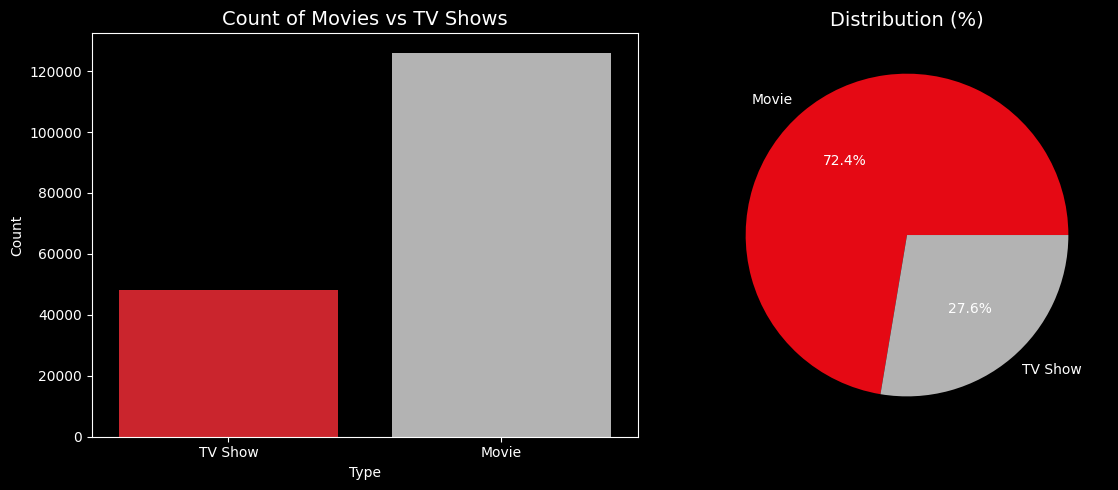

Value Counts:
type
Movie      126079
TV Show     48140
Name: count, dtype: int64


In [35]:
# Chart - 1 visualization code
plt.style.use('dark_background')
netflix_red = "#E50914"
netflix_gray = "#B3B3B3"

plt.figure(figsize=(12,5))

# Bar Chart
plt.subplot(1,2,1)
sns.countplot(
    data=df_final,
    x='type',
    palette=[netflix_red, netflix_gray]
)
plt.title("Count of Movies vs TV Shows", fontsize=14, color='white')
plt.xlabel("Type", color='white')
plt.ylabel("Count", color='white')

# Pie Chart
plt.subplot(1,2,2)
df_final['type'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=[netflix_red, netflix_gray],
    textprops={'color':'white'}
)
plt.title("Distribution (%)", fontsize=14, color='white')
plt.ylabel("")

plt.tight_layout()
plt.show()

print("Value Counts:")
print(df_final['type'].value_counts())

##### 1. Why did you pick the specific chart?

I chose a bar chart and a pie chart because they clearly show the distribution of Movies vs TV Shows in a simple and intuitive way.
The bar chart highlights the absolute count difference, while the pie chart helps visualize the percentage share.
Since “type” is a categorical variable and only has two categories, these charts provide the most effective and uncluttered representation of this comparison.


##### 2. What is/are the insight(s) found from the chart?

The chart shows that Movies significantly outnumber TV Shows on Netflix. Movies form the majority of the platform’s content library, while TV Shows account for a smaller but still substantial portion. This indicates that, in terms of volume, Netflix has historically focused more on Movies, although the presence of a sizable TV Show catalog suggests strategic investment in episodic content as well.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can contribute to positive business impact.
Knowing that Movies dominate the catalog helps Netflix understand user expectations and content availability.
If Netflix continues investing strategically in TV Shows—which are known for increasing user retention due to longer watch time—it can improve engagement metrics and reduce churn.

Possible negative insight:
If the platform has too many Movies and fewer TV Shows compared to competitors, users who prefer series may shift to other platforms.
This imbalance could impact long-term growth if not addressed with a balanced content strategy.


#### Chart - 2 Year-wise Content Addition Trend (Movies vs TV Shows)

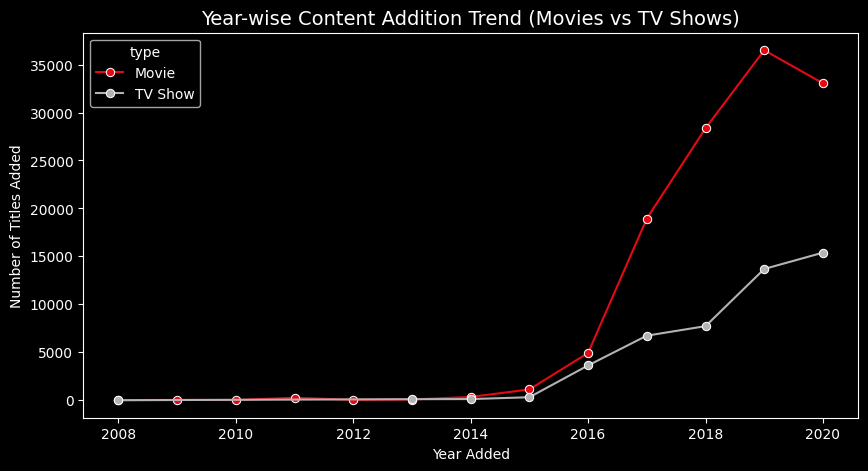

In [36]:
# Chart - 2 visualization code

plt.style.use('dark_background')

netflix_red = "#E50914"
netflix_gray = "#B3B3B3"

year_type_counts = df_final.groupby(['year_added', 'type']).size().reset_index(name='count')
year_type_counts = year_type_counts.sort_values('year_added')

# Filter for years between 1950 and 2020
year_type_counts = year_type_counts[(year_type_counts['year_added'] >= 1950) &
                                     (year_type_counts['year_added'] <= 2020)]

plt.figure(figsize=(10,5))

sns.lineplot(
    data=year_type_counts,
    x='year_added',
    y='count',
    hue='type',
    palette=[netflix_red, netflix_gray],
    marker='o'
)

plt.title("Year-wise Content Addition Trend (Movies vs TV Shows)", fontsize=14, color='white')
plt.xlabel("Year Added", color='white')
plt.ylabel("Number of Titles Added", color='white')

plt.xticks(color='white')
plt.yticks(color='white')

plt.show()

##### 1. Why did you pick the specific chart?

A line chart was chosen because it is best suited for analyzing trends over time. Since the objective is to study how the number of Movies and TV Shows added has changed year by year, a line chart allows clear visualization of growth patterns, increases, declines, and relative movement between the two content types across different years.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a steady increase in the total amount of content added over the years, with a noticeable rise in TV Shows in more recent years. While Movies continue to be added consistently, the growth rate of TV Shows appears stronger in the later period. This indicates a shift in Netflix’s content strategy towards expanding episodic and long-form content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can support positive business impact by guiding content investment decisions. An increase in TV Shows suggests a strategy to improve user retention, as series encourage repeated viewing and longer platform engagement. This can help reduce churn and strengthen user loyalty.

A potential negative implication is that overemphasis on TV Shows may reduce the variety of Movies available, which could affect users who prefer short-form, one-time viewing experiences. Maintaining a balanced mix is important to cater to diverse audience preferences.

#### Chart - 3 Country-wise Content Distribution (Top 10 Countries)

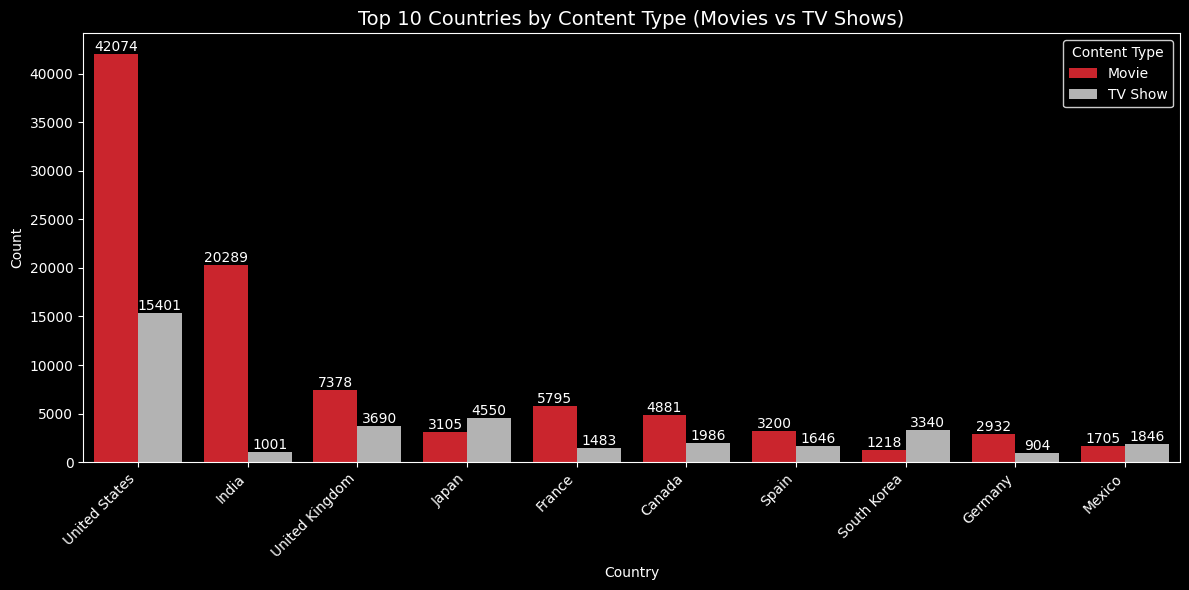

In [37]:
# Chart 3 – Country-wise Content Distribution (Top 10 Countries)

plt.style.use('dark_background')

netflix_red = "#E50914"
netflix_gray = "#B3B3B3"

# Get top 10 countries (excluding NaN)
top_countries = df_final[df_final['Country']!='nan']['Country'].value_counts().head(10).index

# Filter dataset for top countries only (excluding NaN)
country_type_data = df_final[(df_final['Country'].isin(top_countries)) & (df_final['Country']!='nan')]

plt.figure(figsize=(12,6))

ax = sns.countplot(
    data=country_type_data,
    x='Country',
    hue='type',
    order=top_countries,
    palette=[netflix_red, netflix_gray]
)

# Add data labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, color='white', fontsize=10)

plt.title("Top 10 Countries by Content Type (Movies vs TV Shows)", fontsize=14, color='white')
plt.xlabel("Country", color='white')
plt.ylabel("Count", color='white')

plt.xticks(rotation=45, color='white', ha='right')
plt.yticks(color='white')

plt.legend(title="Content Type", facecolor='black', edgecolor='white')
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

A  bar chart with hue separation was chosen to compare content volume across multiple countries while also distinguishing between Movies and TV Shows. This format makes it easy to rank countries by content count and visually assess differences in content type distribution within each country.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that a small number of countries contribute a large portion of Netflix’s content library. The United States appears as the leading contributor, followed by countries such as India and the United Kingdom. Some countries show a stronger dominance of Movies, while others display a more balanced mix of Movies and TV Shows, indicating regional differences in content production and consumption patterns.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can support positive business impact by helping Netflix identify high-performing content markets and prioritize regional investments. Understanding which countries produce more Movies or TV Shows allows Netflix to tailor content acquisition and production strategies to local audience preferences.

A possible negative implication is over-dependence on a small number of countries for content supply. This could limit cultural diversity and reduce appeal in underrepresented regions if not balanced with broader international content sourcing.


#### Chart - 4 Genre Distribution.

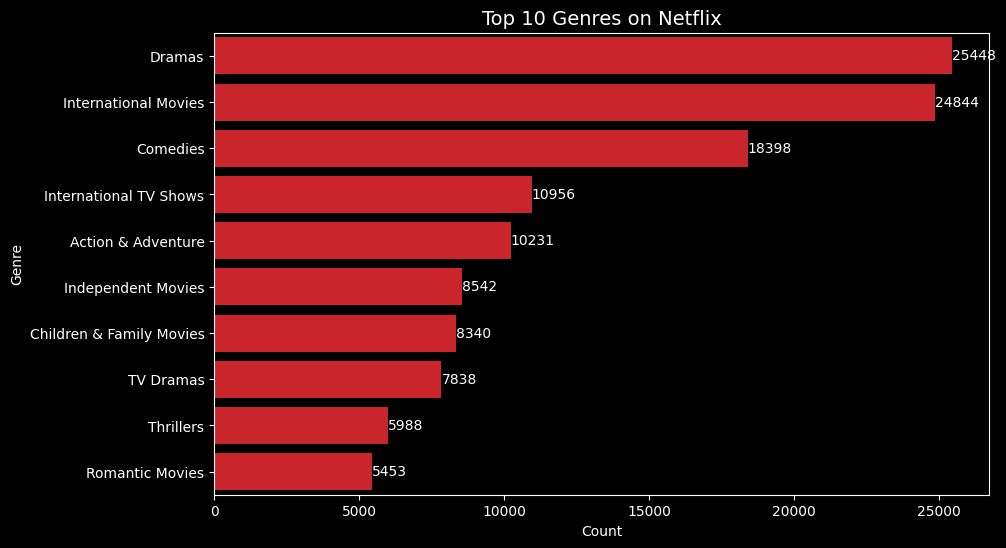

In [38]:
# Chart 4 – Genre Distribution (Top 10 Genres)
plt.style.use('dark_background')

netflix_red = "#E50914"

top_genres = df_final['Genre'].value_counts().head(10)

plt.figure(figsize=(10,6))

ax = sns.barplot(
    x=top_genres.values,
    y=top_genres.index,
    palette=[netflix_red] * len(top_genres)
)

# Add data labels
for i, v in enumerate(top_genres.values):
    ax.text(v + 0.5, i, str(v), color='white', va='center', fontsize=10)

plt.title("Top 10 Genres on Netflix", fontsize=14, color='white')
plt.xlabel("Count", color='white')
plt.ylabel("Genre", color='white')

plt.xticks(color='white')
plt.yticks(color='white')

plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart was chosen because it is effective for comparing frequencies across multiple categories. Since genre names can be long, a horizontal layout improves readability and allows easy identification of the most dominant genres in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that a few genres dominate Netflix’s content library. Genres such as International Movies, Dramas, Comedies, and Documentaries appear frequently, indicating a strong focus on globally appealing and narrative-driven content. The presence of multiple overlapping genres also highlights Netflix’s strategy of catering to diverse audience interests.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can help Netflix optimize content acquisition and production by focusing on high-demand genres that attract a broad audience. Strong representation of popular genres supports user engagement and satisfaction.

A potential negative implication is genre saturation, where overrepresentation of a few genres may reduce content variety and limit discovery of niche categories. Balancing popular genres with emerging or underrepresented genres is important to maintain long-term viewer interest.

Chart - 5 Movie Duration Distribution (Minutes)

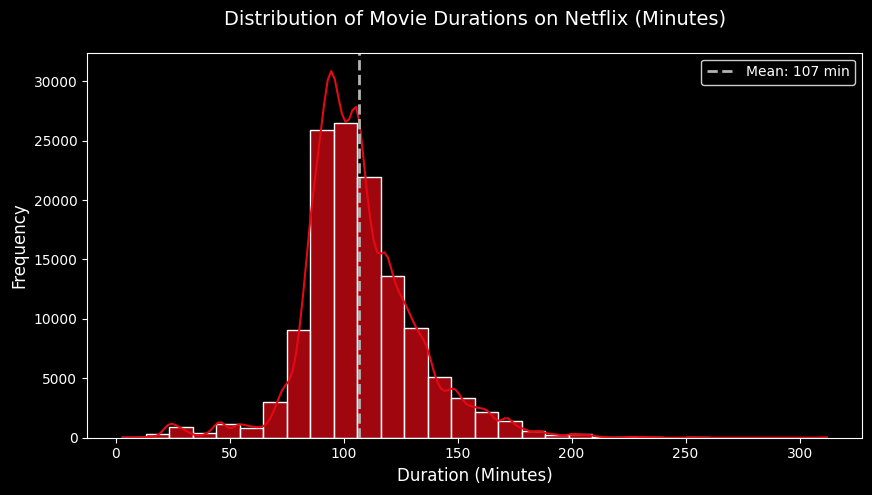

In [39]:
# Chart 5 – Movie Duration Distribution (Minutes)

plt.style.use('dark_background')

netflix_red = "#E50914"
netflix_gray = "#B3B3B3"

plt.figure(figsize=(10,5))

sns.histplot(
    df_movies['duration_minutes'],
    bins=30,
    kde=True,
    color=netflix_red,
    edgecolor='white',  # Add white edges to bars
    alpha=0.7  # Slight transparency
)

plt.title("Distribution of Movie Durations on Netflix (Minutes)", fontsize=14, color='white', pad=20)
plt.xlabel("Duration (Minutes)", color='white', fontsize=12)
plt.ylabel("Frequency", color='white', fontsize=12)

# Add vertical line for mean duration
mean_duration = df_movies['duration_minutes'].mean()
plt.axvline(mean_duration, color=netflix_gray, linestyle='--', linewidth=2, label=f'Mean: {mean_duration:.0f} min')

plt.xticks(color='white')
plt.yticks(color='white')
plt.legend(facecolor='black', edgecolor='white', fontsize=10)

plt.show()

##### 1. Why did you pick the specific chart?

A histogram was chosen because it is ideal for understanding the distribution of a continuous numerical variable. Since movie duration is measured in minutes, a histogram allows us to see how movie lengths are spread, whether they are concentrated around certain values, and whether there are any unusually short or long movies.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that most movies on Netflix are concentrated within a specific duration range max at 90-120 minutes, typically around standard feature-length timings.Mean is about 107 minutes. Very short and very long movies appear less frequently, indicating that Netflix largely focuses on conventional movie formats rather than experimental runtimes.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can help Netflix optimize content acquisition by focusing on movie lengths that align with typical viewer preferences and consumption habits. Standard-length movies are easier for users to watch in a single session, which can improve user satisfaction and completion rates.

A potential negative implication is that limited variation in movie length may reduce creative experimentation and niche appeal. Over-standardization could limit content diversity and reduce opportunities for unique storytelling formats.

#### Chart - 6 TV Show Duration Distribution (Number of Seasons)

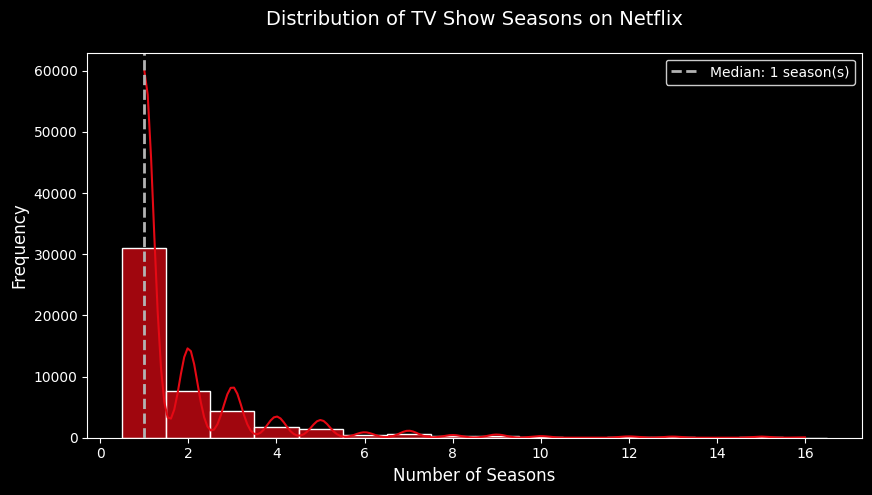

In [40]:
# Chart - 6 visualization code

plt.style.use('dark_background')

netflix_red = "#E50914"
netflix_gray = "#B3B3B3"

plt.figure(figsize=(10,5))

sns.histplot(
    df_tvshows['duration_seasons'],
    bins=20,
    kde=True,
    color=netflix_red,
    edgecolor='white',  # Add white edges to bars
    alpha=0.7,  # Slight transparency
    discrete=True  # Better for integer values like seasons
)

plt.title("Distribution of TV Show Seasons on Netflix", fontsize=14, color='white', pad=20)
plt.xlabel("Number of Seasons", color='white', fontsize=12)
plt.ylabel("Frequency", color='white', fontsize=12)

# Add median line
median_seasons = df_tvshows['duration_seasons'].median()
plt.axvline(median_seasons, color=netflix_gray, linestyle='--', linewidth=2, label=f'Median: {median_seasons:.0f} season(s)')

plt.xticks(color='white')
plt.yticks(color='white')
plt.legend(facecolor='black', edgecolor='white', fontsize=10)

plt.show()


##### 1. Why did you pick the specific chart?

A histogram was chosen because it effectively shows the distribution of a continuous numerical variable. Since the number of seasons is a numeric measure, a histogram helps identify whether most TV shows are short-running or long-running and whether there are any extreme values.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that most TV shows on Netflix have a relatively small number of seasons, indicating a strong presence of limited-series or short-running shows. Very long-running series with many seasons are comparatively rare, suggesting that Netflix often focuses on concise, tightly structured content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can support positive business impact by guiding Netflix’s content production strategy toward formats that align with viewer consumption habits. Shorter series can be easier for users to complete, potentially improving satisfaction and reducing drop-off rates.

A possible negative implication is that fewer long-running series may limit opportunities for building long-term viewer attachment to specific shows. Some users prefer extended series with deep story development, and underrepresenting this format could reduce engagement among that audience segment.

#### Chart - 7 Rating Distribution Analysis

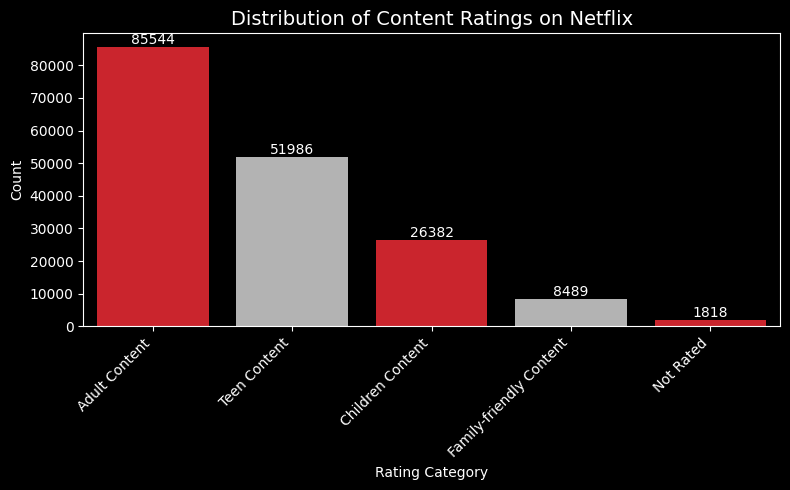

In [41]:
# Chart 7– Rating Category Distribution

plt.style.use('dark_background')

netflix_red = "#E50914"
netflix_gray = "#B3B3B3"

plt.figure(figsize=(8,5))

ax = sns.countplot(
    x='rating',
    data=df_final,
    order=df_final['rating'].value_counts().index,
    palette=[netflix_red, netflix_gray, netflix_red, netflix_gray, netflix_red]
)

# Add data labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, color='white', fontsize=10)

plt.title("Distribution of Content Ratings on Netflix", fontsize=14, color='white')
plt.xlabel("Rating Category", color='white')
plt.ylabel("Count", color='white')

plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color='white')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen because it is suitable for comparing the frequency of different categorical rating groups. Since the ratings were already binned into meaningful categories, a bar chart provides a clear and direct comparison of how much content exists for each audience segment.


##### 2. What is/are the insight(s) found from the chart?

The chart shows that Adult Content and Teen Content categories form a major portion of Netflix’s content library. This indicates a strong focus on mature and young adult audiences. Family-friendly and Children Content are also present but in relatively smaller proportions, suggesting that Netflix prioritizes content for older viewers while still maintaining offerings for younger audiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can support positive business impact by helping Netflix align its content strategy with its primary audience segments. A strong focus on Adult and Teen Content can drive engagement among high-consumption users, increasing watch time and platform loyalty.

A potential negative implication is the risk of under-serving families and younger audiences if children’s content remains limited. This could reduce the platform’s attractiveness to households with diverse age groups. Maintaining a balanced rating mix is important to maximize overall audience reach.

#### Chart 8 – Top 10 Directors by Number of Titles.

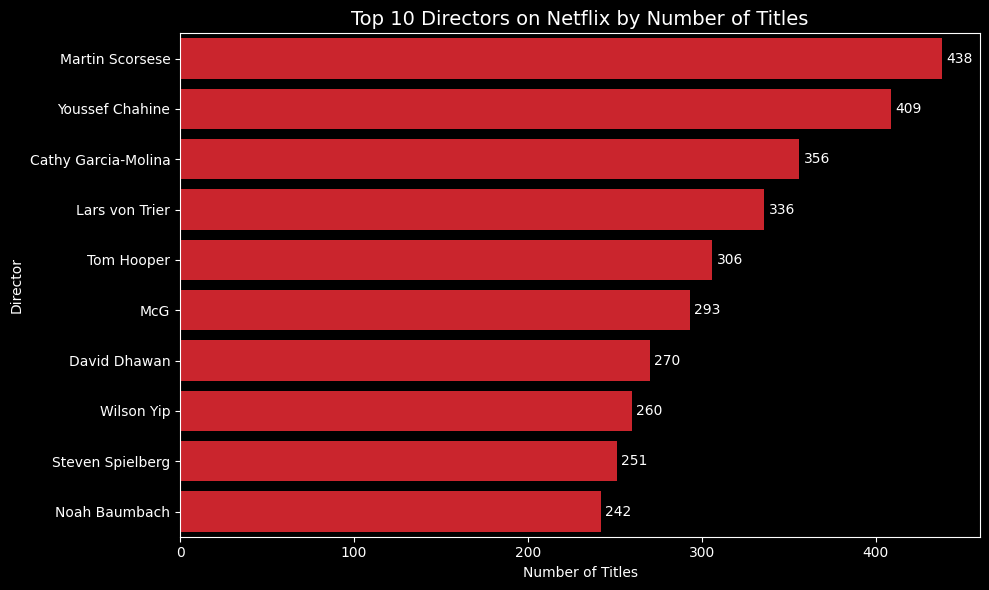

In [42]:
# Chart 8 – Top 10 Directors by Number of Titles
plt.style.use('dark_background')

netflix_red = "#E50914"
netflix_gray = "#B3B3B3"

# Excluding NaN values
filtered_directors = df_final[(df_final['Directors'] != 'Unknown') & (df_final['Directors'].notna())]

top_directors = filtered_directors['Directors'].value_counts().head(10)

plt.figure(figsize=(10,6))

ax = sns.barplot(
    x=top_directors.values,
    y=top_directors.index,
    palette=[netflix_red] * len(top_directors)
)

# Add data labels at the end of each bar
for container in ax.containers:
    ax.bar_label(container, color='white', fontsize=10, padding=3)

plt.title("Top 10 Directors on Netflix by Number of Titles", fontsize=14, color='white')
plt.xlabel("Number of Titles", color='white')
plt.ylabel("Director", color='white')

plt.xticks(color='white')
plt.yticks(color='white')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart was chosen because it allows clear comparison across multiple categories and accommodates long director names without clutter. Since the objective is to identify the most frequently appearing directors on Netflix, this chart format makes ranking and comparison straightforward.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that a small group of directors contribute multiple titles to Netflix’s catalog. This indicates that Netflix maintains repeated collaborations with certain directors, possibly due to proven performance or long-term partnerships.

It is important to note that a portion of the dataset originally contained missing director information, which was excluded from this analysis to avoid skewed results.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can help Netflix strengthen relationships with high-performing directors and identify creative partners who consistently deliver content. Leveraging such collaborations can improve production efficiency and content quality.

A potential negative implication is creative saturation. Over-reliance on a limited set of directors may reduce stylistic diversity and innovation, which could impact audience engagement over time.

#### Chart - 9 Top 10 Actors by Number of Titles

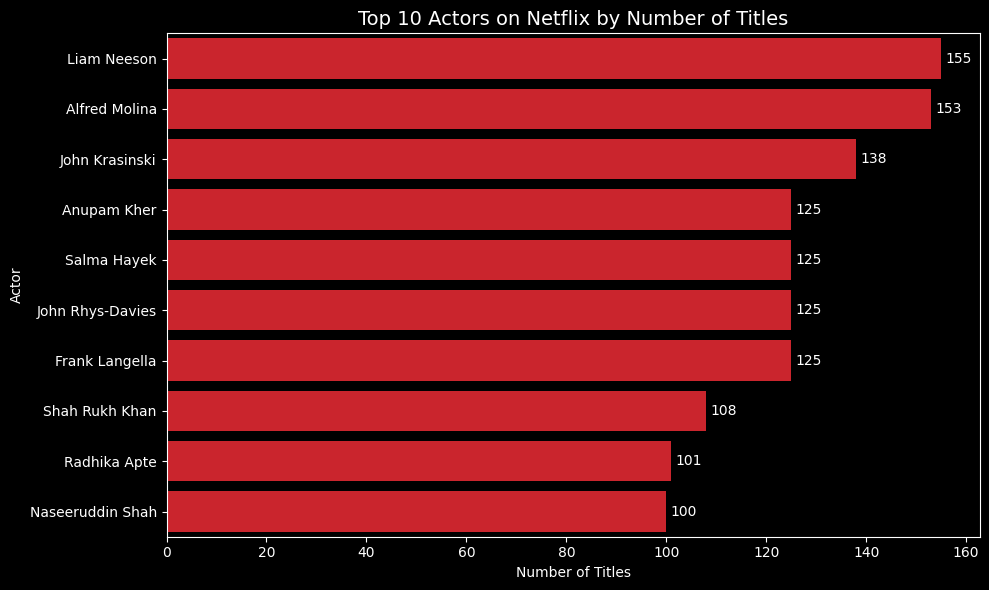

In [43]:
# Chart 9 – Top 10 Actors by Number of Titles
plt.style.use('dark_background')

netflix_red = "#E50914"
netflix_gray = "#B3B3B3"

# Exclude NaN values properly
filtered_actors =  df_final[(df_final['Actors'] != 'Unknown') & (df_final['Actors'].notna())]

top_actors = filtered_actors['Actors'].value_counts().head(10)

plt.figure(figsize=(10,6))

ax = sns.barplot(
    x=top_actors.values,
    y=top_actors.index,
    palette=[netflix_red] * len(top_actors)
)


for container in ax.containers:
    ax.bar_label(container, color='white', fontsize=10, padding=3)

plt.title("Top 10 Actors on Netflix by Number of Titles", fontsize=14, color='white')
plt.xlabel("Number of Titles", color='white')
plt.ylabel("Actor", color='white')

plt.xticks(color='white')
plt.yticks(color='white')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart was chosen because it allows easy comparison across multiple actors and accommodates longer names without clutter. Since the goal is to identify actors who appear most frequently in Netflix content, this format clearly highlights ranking and relative contribution.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that a small number of actors appear repeatedly across multiple Netflix titles. This suggests that Netflix collaborates frequently with certain actors, possibly due to popularity, audience appeal, or ongoing project partnerships. It also reflects the presence of prolific actors in specific regional or genre-based content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can support positive business impact by helping Netflix identify actors with strong screen presence and recurring popularity, which can be leveraged for marketing, casting, and content promotion strategies.

A potential negative implication is overexposure. Repeated use of the same actors across many titles may lead to audience fatigue and reduced novelty. Ensuring a balance between familiar faces and new talent is important to maintain long-term viewer interest.

#### Chart - 10 Genre vs Content Type (Movies vs TV Shows by Genre)

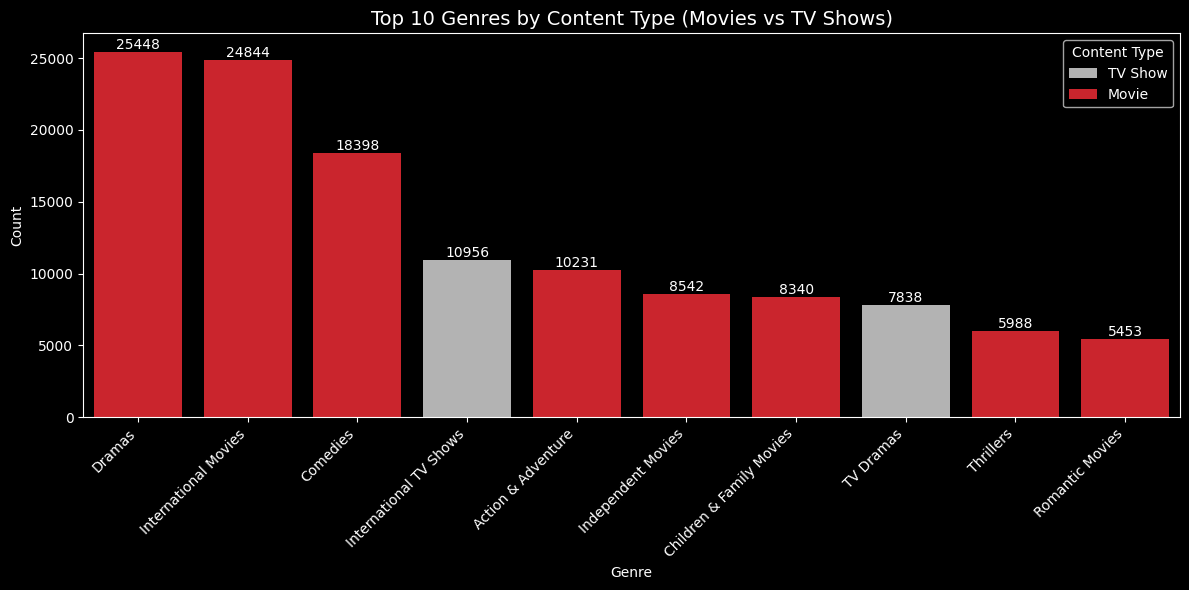

In [44]:
# Chart 10 – Genre vs Content Type (Movies vs TV Shows by Genre)

plt.style.use('dark_background')

netflix_red = "#E50914"
netflix_gray = "#B3B3B3"

# Get top 10 genres
top_genres = df_final['Genre'].value_counts().head(10).index

# Filter dataset for top genres only
genre_type_data = df_final[df_final['Genre'].isin(top_genres)]

plt.figure(figsize=(12,6))

ax = sns.countplot(
    data=genre_type_data,
    x='Genre',
    hue='type',
    order=top_genres,
    palette=[netflix_gray, netflix_red]
)

for container in ax.containers:
    ax.bar_label(container, color='white', fontsize=10)

plt.title("Top 10 Genres by Content Type (Movies vs TV Shows)", fontsize=14, color='white')
plt.xlabel("Genre", color='white')
plt.ylabel("Count", color='white')

plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color='white')

plt.legend(title="Content Type")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A grouped bar chart with hue separation was chosen because it allows direct comparison between Movies and TV Shows within each genre. This format makes it easy to see whether a genre is dominated by Movies, TV Shows, or has a balanced distribution, which is essential for understanding content strategy at a genre level.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that some genres are more heavily represented by Movies, while others have a stronger presence of TV Shows. For example, certain genres such as International Movies and Dramas tend to be movie-dominant, whereas genres like TV Dramas or International TV show content show a relatively higher proportion of TV Shows. This indicates that Netflix uses different formats to deliver content depending on genre suitability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can support positive business impact by helping Netflix optimize content format decisions for each genre. Understanding which genres perform better as Movies versus TV Shows allows more effective allocation of production budgets and creative resources.

A potential negative implication is over-formatting, where forcing a genre into a specific format may limit experimentation and creative flexibility. Relying too heavily on one format within a genre could also restrict audience choice.

#### Chart - 11 Release Year vs Content Volume (Overall Growth Trend)

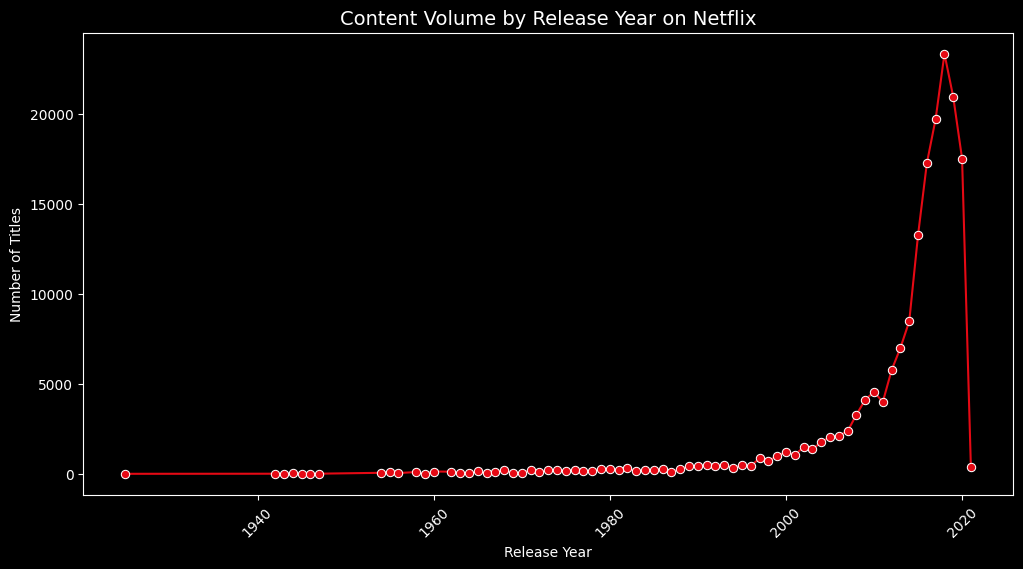

In [45]:
# Chart - 11 visualization code

plt.style.use('dark_background')

netflix_red = "#E50914"
netflix_gray = "#B3B3B3"

release_year_counts = df_final['release_year'].value_counts().sort_index()

plt.figure(figsize=(12,6))

sns.lineplot(
    x=release_year_counts.index,
    y=release_year_counts.values,
    color=netflix_red,
    marker='o'
)

plt.title("Content Volume by Release Year on Netflix", fontsize=14, color='white')
plt.xlabel("Release Year", color='white')
plt.ylabel("Number of Titles", color='white')

plt.xticks(rotation=45, color='white')
plt.yticks(color='white')

plt.show()


##### 1. Why did you pick the specific chart?

A line chart was chosen because it is well suited for visualizing trends across time. Since the release year is a temporal variable, a line chart clearly shows how content volume changes over different years and helps identify periods of increased or decreased production.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the volume of content increases significantly in more recent years, indicating that a large portion of Netflix’s catalog consists of relatively newer titles. This suggests an emphasis on fresh and contemporary content rather than relying heavily on older releases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can support positive business impact by highlighting Netflix’s focus on acquiring or producing newer content, which can attract users seeking up-to-date and relevant entertainment. A strong presence of recent releases can improve platform competitiveness.

A potential negative implication is reduced representation of classic or older content, which may limit appeal for users who prefer nostalgic or vintage titles. Balancing new releases with classic content can help cater to a wider audience.

#### Chart - 12 Year Added vs TV Show Growth (Focused TV Trend)

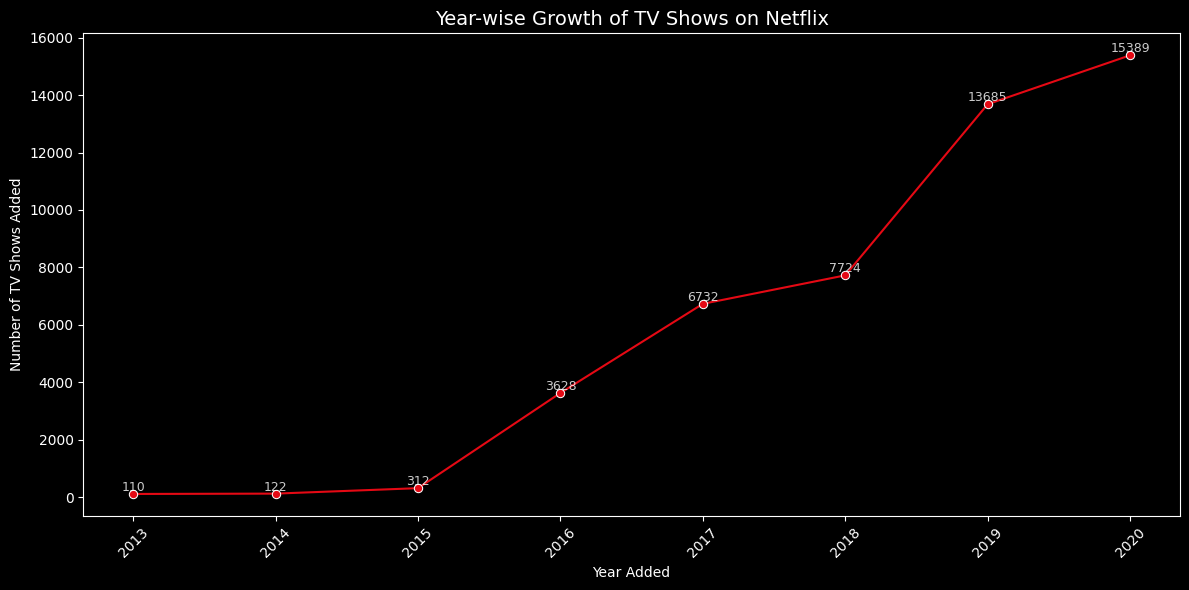

In [46]:
# Chart - 12 visualization code


plt.style.use('dark_background')

netflix_red = "#E50914"
netflix_gray = "#B3B3B3"

# Filter only TV Shows
tv_year_counts = df_final[df_final['type'] == 'TV Show']['year_added'].value_counts().sort_index()
tv_year_counts = tv_year_counts[(tv_year_counts.index >= 2010) & (tv_year_counts.index <= 2020)]
plt.figure(figsize=(12,6))

ax = sns.lineplot(
    x=tv_year_counts.index,
    y=tv_year_counts.values,
    color=netflix_red,
    marker='o'
)

# Add data labels on each point
for x, y in zip(tv_year_counts.index, tv_year_counts.values):
    ax.text(x, y, str(y), color='white', fontsize=9,
            ha='center', va='bottom', alpha=0.8)

plt.title("Year-wise Growth of TV Shows on Netflix", fontsize=14, color='white')
plt.xlabel("Year Added", color='white')
plt.ylabel("Number of TV Shows Added", color='white')

plt.xticks(rotation=45, color='white')
plt.yticks(color='white')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A line chart was chosen because it is effective for analyzing growth patterns over time. Since the objective is to examine how Netflix’s investment in TV Shows has evolved year by year, a line chart provides a clear view of increases, slowdowns, or spikes in TV Show additions.


##### 2. What is/are the insight(s) found from the chart?

The chart shows an upward trend in the number of TV Shows added over the years, especially in more recent periods. This suggests that Netflix has been increasingly expanding its TV Show catalog, supporting the idea that the platform is focusing more on episodic content over time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can support positive business impact by validating Netflix’s strategy to invest in TV Shows, which typically drive longer user engagement and higher retention. Episodic content encourages repeat visits and sustained platform usage.

A potential negative implication is increased production and acquisition cost, as TV series often require long-term investment and commitment. If not managed carefully, this could impact profitability or lead to content oversupply.


#### Chart 13 – Top Countries for TV Shows

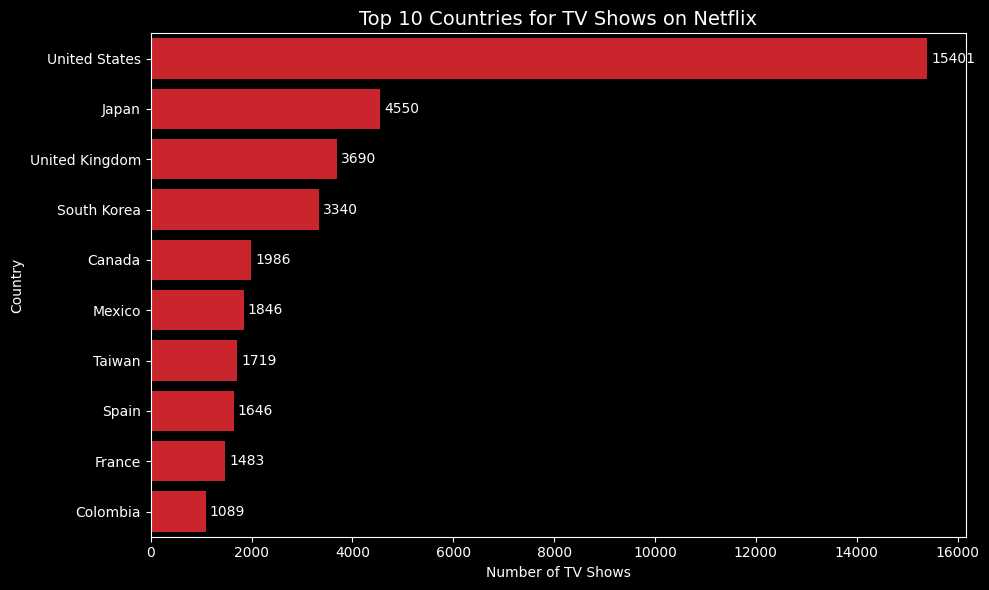

In [47]:
# Chart - 13 visualization code

plt.style.use('dark_background')

netflix_red = "#E50914"
netflix_gray = "#B3B3B3"


# Filter only TV Shows
tv_country_data = df_final[df_final['type'] == 'TV Show']

# Get top 10 countries for TV Shows
top_tv_countries = tv_country_data[tv_country_data['Country']!='nan']['Country'].value_counts().head(10)

plt.figure(figsize=(10,6))

ax = sns.barplot(
    x=top_tv_countries.values,
    y=top_tv_countries.index,
    palette=[netflix_red] * len(top_tv_countries)
)

# Add data labels at the end of each bar
for container in ax.containers:
    ax.bar_label(container, color='white', fontsize=10, padding=3)

plt.title("Top 10 Countries for TV Shows on Netflix", fontsize=14, color='white')
plt.xlabel("Number of TV Shows", color='white')
plt.ylabel("Country", color='white')

plt.xticks(color='white')
plt.yticks(color='white')

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A horizontal bar chart was chosen because it clearly displays ranking and comparison across multiple countries. Since country names can be long and the objective is to identify the leading contributors of TV Shows, this layout improves readability and makes differences in contribution more visible.


##### 2. What is/are the insight(s) found from the chart?

The chart shows that a small number of countries dominate TV Show production on Netflix. Countries such as the United States, India, and the United Kingdom appear as major contributors, indicating strong series production capabilities in these regions. This suggests that Netflix relies heavily on specific markets for episodic content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can support positive business impact by helping Netflix focus its TV Show investments in regions with proven production strength and audience demand. Strengthening partnerships in these countries can improve content quality and consistency.

A potential negative implication is geographic concentration risk. Over-reliance on a few countries for TV content may reduce cultural diversity and limit global representation, which could affect international audience engagement.

#### Chart 14 – Genre vs Country Heatmap (Content Density)

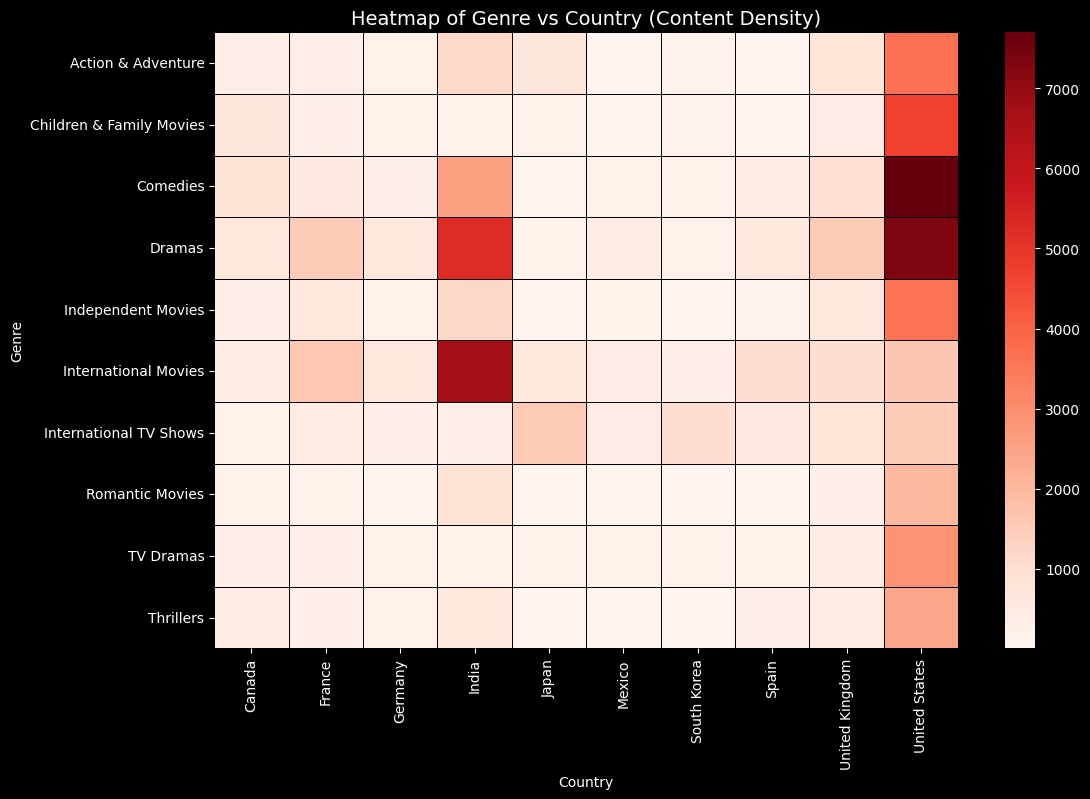

In [48]:
# Chart 14 – Genre vs Country Heatmap (Content Density)

plt.style.use('dark_background')

netflix_red = "#E50914"

# Select top 10 countries and top 10 genres for clarity
top_countries = df_final['Country'].value_counts().head(10).index
top_genres = df_final['Genre'].value_counts().head(10).index

# Filter dataset
heatmap_data = df_final[
    (df_final['Country'].isin(top_countries)) &
    (df_final['Genre'].isin(top_genres))
]

# Create pivot table
genre_country_pivot = pd.pivot_table(
    heatmap_data,
    index='Genre',
    columns='Country',
    values='title',
    aggfunc='count',
    fill_value=0
)

plt.figure(figsize=(12,8))

sns.heatmap(
    genre_country_pivot,
    cmap="Reds",
    linewidths=0.5,
    linecolor='black'
)

plt.title("Heatmap of Genre vs Country (Content Density)", fontsize=14, color='white')
plt.xlabel("Country", color='white')
plt.ylabel("Genre", color='white')

plt.xticks(color='white')
plt.yticks(color='white')

plt.show()


##### 1. Why did you pick the specific chart?

A heatmap was chosen because it is effective for visualizing relationships between two categorical variables at the same time. In this case, it helps identify how different genres are distributed across top content-producing countries. The color intensity makes it easy to spot strong and weak combinations, which would be difficult to interpret using simple bar charts.

##### 2. What is/are the insight(s) found from the chart?

The heatmap shows that certain countries are strongly associated with specific genres. For example, some countries have high concentration in International Movies or Dramas, while others show a more balanced spread across multiple genres. This indicates regional specialization in content production and highlights how cultural and market factors influence genre preferences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can support positive business impact by enabling Netflix to align content strategy with regional strengths. Understanding which countries perform well in which genres allows targeted investment, localized marketing, and better content planning for different markets.

A potential negative implication is over-specialization, where countries become narrowly focused on specific genres. This could limit creative diversity and reduce cross-genre experimentation in those regions if not managed carefully.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

Are TV Shows added more recently than Movies?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


Null Hypothesis (H0):
There is no significant difference in the average 'year_added' between
Movies and TV Shows on Netflix.

Alternate Hypothesis (H1):
TV Shows are added to Netflix more recently than Movies,
meaning TV Shows have a significantly higher average 'year_added' than Movies.


#### 2. Perform an appropriate statistical test.

In [49]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Extract year_added for both groups
movies_year = df_final[df_final['type'] == "Movie"]['year_added'].dropna()
shows_year = df_final[df_final['type'] == "TV Show"]['year_added'].dropna()

# Perform Welch’s t-test
t_stat, p_val = ttest_ind(movies_year, shows_year, equal_var=False)

print("T-statistic:", t_stat)
print("P-value: {:.8f}".format(p_val))


# Means for reference
print("Mean year_added - Movies:", movies_year.mean())
print("Mean year_added - TV Shows:", shows_year.mean())



T-statistic: -5.266650329020652
P-value: 0.00000014
Mean year_added - Movies: 2018.5808342388502
Mean year_added - TV Shows: 2018.6190693809722


If the p-value is less than 0.05, we reject the null hypothesis and conclude that TV Shows are added more recently than Movies. If the p-value is greater than 0.05, we fail to reject the null hypothesis and conclude that there is no significant difference.

##### Which statistical test have you done to obtain P-Value?

A Welch’s t-test was conducted to compare the average year of content addition between Movies and TV Shows on Netflix. The results show a statistically significant difference between the two groups (p < 0.001). The mean year of addition for TV Shows (2018.61) is higher than that of Movies (2018.58), indicating that TV Shows are, on average, added more recently than Movies. Therefore, the null hypothesis is rejected and the alternative hypothesis is accepted.
While the difference is statistically significant due to large sample size, the practical difference is small, indicating broadly similar content addition timelines.


##### Why did you choose the specific statistical test?

I have chosen Welch’s t-test because:

1. I am comparing the means of two independent groups
   (Movies vs TV Shows).

2. The sample sizes of the two groups are different
   (more movies than TV shows).

3. The variance in 'year_added' is not guaranteed to be equal
   between both groups, and Welch’s t-test does not assume equal variance.

4. The variable 'year_added' is numerical and continuous,
   making the t-test a suitable method.

Together, these conditions make Welch’s t-test the most appropriate
and statistically reliable choice for this hypothesis.


### Hypothetical Statement - 2

Do Movies and TV Shows differ in duration?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0):
There is no significant difference in the average duration of Movies on Netflix.

Alternate Hypothesis (H1):
Movies on Netflix have a significantly higher average duration in minutes.


#### 2. Perform an appropriate statistical test.

In [50]:
from scipy.stats import ttest_1samp

movie_durations = df_movies['duration_minutes'].dropna()

# Test whether average movie duration is significantly greater than 90 minutes
t_stat, p_val = ttest_1samp(movie_durations, 90)

print("T-statistic:", t_stat)

print("P-value: {:.3f}".format(p_val))

print("Mean Movie Duration:", movie_durations.mean())


T-statistic: 239.84303852682135
P-value: 0.000
Mean Movie Duration: 106.80396418118798


##### Which statistical test have you done to obtain P-Value?

A one-sample t-test was conducted to determine whether the average movie duration on Netflix is significantly greater than 90 minutes. The results show that the mean movie duration (106.8 minutes) is significantly higher than 90 minutes (p < 0.001). Therefore, the null hypothesis is rejected, and it is concluded that Netflix movies are, on average, longer than 90 minutes.

##### Why did you choose the specific statistical test?

A one-sample t-test was chosen because we are comparing the mean duration of a single sample (Movies on Netflix) against a known reference value (90 minutes). The objective is to determine whether the average movie length on Netflix is significantly different from a standard feature film duration. Since the data is continuous and approximately normally distributed for large samples, the one-sample t-test is an appropriate statistical method.

### Hypothetical Statement - 3

Is there a significant association between country and content type?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0):
There is no association between Country and content type (Movie or TV Show).

Alternate Hypothesis (H1):
There is a significant association between Country and content type on Netflix.


#### 2. Perform an appropriate statistical test.

In [51]:
# Perform Statistical Test to obtain P-Value
# Split multi-country entries
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(df_final['Country'], df_final['type'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("P-value: {:.3f}".format(p))



Chi-square Statistic: 26932.455777456275
P-value: 0.000


##### Which statistical test have you done to obtain P-Value?

A Chi-square test of independence was conducted to examine the relationship between country of production and content type (Movie vs TV Show) on Netflix. The results show a statistically significant association between the two variables (p < 0.001). Therefore, the null hypothesis is rejected, indicating that the distribution of Movies and TV Shows varies significantly across different countries.


##### Why did you choose the specific statistical test?

I chose the Chi-Square Test because:

1. Both variables are categorical:
   - Country → countries of production
   - Type → Movie or TV Show

2. The Chi-Square Test for Independence is the correct method to check
   if two categorical variables are related.

3. By exploding the multi-country entries and selecting the top 10
   countries, the test becomes reliable and avoids sparsity issues.

4. The test evaluates whether different countries tend to produce
   different proportions of Movies and TV Shows.

Hence, the Chi-Square test is the most appropriate statistical test
for this hypothesis.


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [52]:
df_ml = df.copy()
print(df_ml.shape)


(7770, 12)


In [53]:
df_ml.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

The dataset contains two separate duration columns: duration_minutes for Movies and duration_seasons for TV Shows. As these attributes are mutually exclusive, each record contains a value in only one of the two columns, while the other remains null. These null values are structural and indicate “not applicable” rather than missing data. Therefore, no imputation was performed on these columns to avoid introducing artificial information.

### 2. Handling Outliers

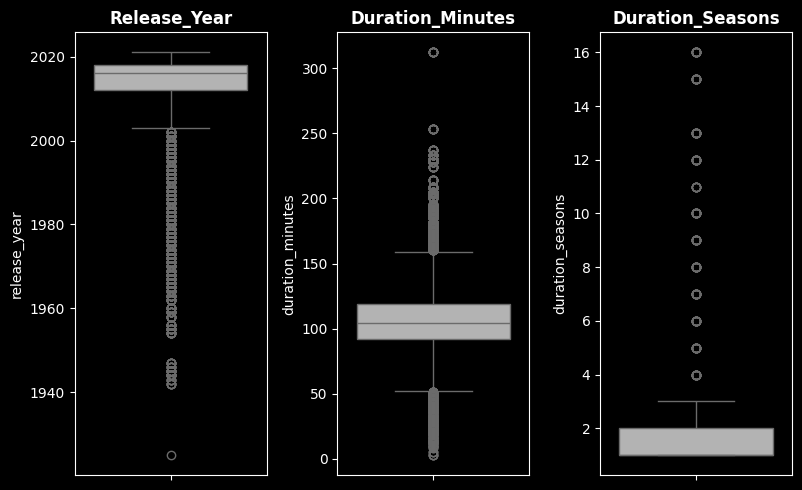

In [54]:
# Handling Outliers & Outlier treatments

netflix_red = "#E50914"
netflix_gray = "#B3B3B3"
continous_value_feature=["release_year","duration_minutes","duration_seasons"]
# checking outliers with the help of box plot for continous features
plt.figure(figsize=(16,5))
for n,column in enumerate(continous_value_feature):
  plt.subplot(1,6, n+1)
  sns.boxplot(df_final[column],color=netflix_gray)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Handling Outliers:
Boxplots were used to examine the distribution and identify potential outliers in numerical attributes such as release_year, duration_minutes, duration_seasons and year_added. Although extreme values were observed, these represent genuine variations in content duration and production timelines rather than data errors. For example, unusually long movies or multi-season TV series are valid cases in streaming platforms. Therefore, no outlier removal or transformation was performed to avoid distorting the natural content distribution.

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

The dataset contains multiple categorical attributes such as type, rating, country, genre, directors, and actors. Instead of applying traditional encoding techniques such as Label Encoding or One-Hot Encoding, these attributes were incorporated into a unified textual representation through the combined text feature. Since the objective of the project is to perform text-based clustering, explicit categorical encoding was not required. This approach preserves semantic meaning and avoids high-dimensional sparse representations that could negatively impact clustering performance.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [55]:
df_ml['combined_text'] = (
    df_ml['description'].astype(str) + ' ' +
    df_ml['listed_in'].astype(str) + ' ' +
    df_ml['cast'].astype(str) + ' ' +
    df_ml['director'].astype(str)
)

# checking result
df_ml[['title', 'combined_text']].head()


,title,combined_text
0,3%,In a future where the elite inhabit an island ...
1,7:19,After a devastating earthquake hits Mexico Cit...
2,23:59,"When an army recruit is found dead, his fellow..."
3,9,"In a postapocalyptic world, rag-doll robots hi..."
4,21,A brilliant group of students become card-coun...


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [56]:
# Expand Contraction
# I've = I have,you've = you have,we've = we have,can't = cannot,don't = do not,doesn't = does not
import contractions
import re

def expand_contractions_safe(text):
    try:
        if not isinstance(text, str):
            return ""
        return contractions.fix(text)
    except:
        return text

df_ml['combined_text'] = df_ml['combined_text'].apply(expand_contractions_safe)

df_ml[['title','combined_text']].head()


,title,combined_text
0,3%,In a future where the elite inhabit an island ...
1,7:19,After a devastating earthquake hits Mexico Cit...
2,23:59,"When an army recruit is found dead, his fellow..."
3,9,"In a postapocalyptic world, rag-doll robots hi..."
4,21,A brilliant group of students become card-coun...


In [57]:
print(df_ml.shape)


(7770, 13)


#### 2. Lower Casing

In [58]:
# Lower Casing
df_ml['combined_text'] = df_ml['combined_text'].str.lower()


df_ml[['title','combined_text']].head()

,title,combined_text
0,3%,in a future where the elite inhabit an island ...
1,7:19,after a devastating earthquake hits mexico cit...
2,23:59,"when an army recruit is found dead, his fellow..."
3,9,"in a postapocalyptic world, rag-doll robots hi..."
4,21,a brilliant group of students become card-coun...


#### 3. Removing Punctuations, digits, extra spaces

In [59]:
# Remove Punctuations ,''?
import re

def clean_text_basic(text):
    text = re.sub(r'https\S+|www\.\S+', '', text) #removing url
    text = re.sub(r'[^a-z\s]', ' ', text)   # remove digits & punctuation
    text = re.sub(r'\s+', ' ', text)        # remove extra spaces
    return text.strip()

df_ml['combined_text'] = df_ml['combined_text'].apply(clean_text_basic)

df_ml[['title','combined_text']].head()

,title,combined_text
0,3%,in a future where the elite inhabit an island ...
1,7:19,after a devastating earthquake hits mexico cit...
2,23:59,when an army recruit is found dead his fellow ...
3,9,in a postapocalyptic world rag doll robots hid...
4,21,a brilliant group of students become card coun...


Punctuation, digits, and special characters were removed from the text to reduce noise and ensure that only meaningful alphabetic tokens contribute to the feature space. Extra whitespace was also eliminated to maintain clean and consistent token boundaries.URLs and web links were removed from the text as they do not contribute to semantic understanding of content and may introduce irrelevant noise into the feature space.

#### 4. Removing Stopwords & Removing White spaces

In [60]:
# Remove Stopwords and White spaces
#example a,an,the,in, on, at, by, for, with,is
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# also remove placeholder word
stop_words.add('unknown')

df_ml['combined_text'] = df_ml['combined_text'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in stop_words)
)



In [61]:
#cheking result
df_ml[['title', 'combined_text']].head()


,title,combined_text
0,3%,future elite inhabit island paradise far crowd...
1,7:19,devastating earthquake hits mexico city trappe...
2,23:59,army recruit found dead fellow soldiers forced...
3,9,postapocalyptic world rag doll robots hide fea...
4,21,brilliant group students become card counting ...


Stopwords were removed from the tokenized text to eliminate common words that do not contribute meaningful semantic information. In addition, the placeholder term “unknown” was treated as a custom stopword and removed to prevent missing data indicators from influencing similarity calculations.

#### 5. Text Normalization

In [62]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
#example reducing word to base form running->run
import nltk

# Download required NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Then run your code
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    """Convert POS tag to wordnet format"""
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize_with_pos(text):
    words = text.split()
    pos_tags = pos_tag(words)
    return ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(pos))
                     for word, pos in pos_tags])

df_ml['combined_text'] = df_ml['combined_text'].apply(lemmatize_with_pos)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [63]:
df_ml[['title', 'combined_text']].head()


,title,combined_text
0,3%,future elite inhabit island paradise far crowd...
1,7:19,devastate earthquake hit mexico city trap surv...
2,23:59,army recruit find dead fellow soldier force co...
3,9,postapocalyptic world rag doll robot hide fear...
4,21,brilliant group student become card counting e...


##### Which text normalization technique have you used and why?

Text normalization is the process of converting words into their
standardized or root forms so that semantically similar words are
treated as the same token.

Lemmatization with Part-of-Speech (POS) tagging was applied to reduce words to their base forms while preserving semantic meaning. By identifying the grammatical role of each word (verb, noun, adjective, etc.), the lemmatizer accurately converts words like "trapped" to "trap" and "playing" to "play". This ensures that different inflected forms of the same word are treated as a single feature, improving clustering accuracy.

#### 10. Text Vectorization

In [64]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words='english',
    max_df=0.8,
    min_df=5
)

X_tfidf = tfidf.fit_transform(df_ml['combined_text'])




In [65]:
print(X_tfidf.shape)


(7770, 8670)


##### Which text vectorization technique have you used and why?

Text vectorization is the process of converting textual data into
numerical format so that machine learning models can understand
and process it. For this project, I used **TF-IDF (Term Frequency–
Inverse Document Frequency)** as the text vectorization technique.

I selected TF-IDF because:

1. TF-IDF helps identify the most important words in each
   Netflix description by down-weighting extremely common words
   and giving higher weight to informative or rare words.

2. Unlike Count Vectorization, TF-IDF does not treat all word
   occurrences equally. It assigns higher importance to keywords
   that help differentiate one show/movie description from another,
   which is essential for clustering.

3. The dataset contains thousands of unique words. TF-IDF
   naturally handles high-dimensional sparse text very efficiently,
   making it suitable for large text collections.

4. TF-IDF improves the separation of clusters because content
   with similar story themes ends up having similar TF-IDF profiles,
   enabling better distance-based clustering (KMeans).

5. TF-IDF does not require heavy preprocessing or pre-trained
   language models, which keeps the pipeline simple, fast, and
   scalable for this project.

Therefore, TF-IDF was used to transform the cleaned and normalized
Netflix descriptions into numerical feature vectors for clustering.


### 4. Feature Manipulation & Selection

#### 4.1 4.1 Feature Manipulation and Feature Selection

In [66]:
X_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 199743 stored elements and shape (7770, 8670)>

##### What all feature selection methods have you used  and why?

No manual feature manipulation was performed after vectorization. Feature selection was handled implicitly through the TF-IDF vectorization process.

TF-IDF automatically assigns lower weights to common terms and removes extremely rare or overly frequent words using the min_df and max_df parameters. This ensures that only informative and semantically meaningful terms contribute to the feature space, making explicit feature selection unnecessary.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

No additional data transformation was required. TF-IDF inherently normalizes term frequencies across documents and scales values appropriately for distance-based clustering algorithms. Applying further transformations such as log or power transforms would not add meaningful benefit and may distort the relative importance of textual features.

### 6. Data Scaling

##### Which method have you used to scale you data and why?

Data Scaling:
Explicit data scaling techniques such as StandardScaler or Min-Max scaling were not applied. The primary features used for clustering were TF-IDF vectors derived from normalized text descriptions, which are already scale-normalized.

Numeric metadata features were not directly combined with text vectors for clustering and were therefore not scaled. This approach avoids distortion of distance calculations and preserves the semantic relationships captured by TF-IDF features.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes because:
TF-IDF generates thousands of features (max_features=8949)
High-dimensional data causes:


Sparse vectors

Slow computation

Poor clustering

TruncatedSVD was used for clustering; t-SNE may be used later only for visualization


In [67]:
from sklearn.decomposition import TruncatedSVD
for n_comp in [100, 300, 500, 800,1000,5000]:
    svd = TruncatedSVD(n_components=n_comp, random_state=42)
    X_svd = svd.fit_transform(X_tfidf)
    kmeans = KMeans(n_clusters=4, random_state=42)
    labels = kmeans.fit_predict(X_svd)
    score = silhouette_score(X_svd, labels)
    print(f"Components: {n_comp}, Variance: {svd.explained_variance_ratio_.sum():.3f}, Silhouette: {score:.4f}")


Components: 100, Variance: 0.132, Silhouette: 0.0397
Components: 300, Variance: 0.258, Silhouette: 0.0328
Components: 500, Variance: 0.351, Silhouette: 0.0296
Components: 800, Variance: 0.461, Silhouette: 0.0135
Components: 1000, Variance: 0.521, Silhouette: 0.0122
Components: 5000, Variance: 0.973, Silhouette: 0.0075


In [68]:
# DImensionality Reduction
from sklearn.decomposition import TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt

svd = TruncatedSVD(n_components=300, random_state=42)
X_svd_full = svd.fit_transform(X_tfidf)

cumulative_variance = np.cumsum(svd.explained_variance_ratio_)

print(" Shape:", X_svd_full .shape)
print("Total variance explained:", svd.explained_variance_ratio_.sum())


 Shape: (7770, 300)
Total variance explained: 0.25750743517893115


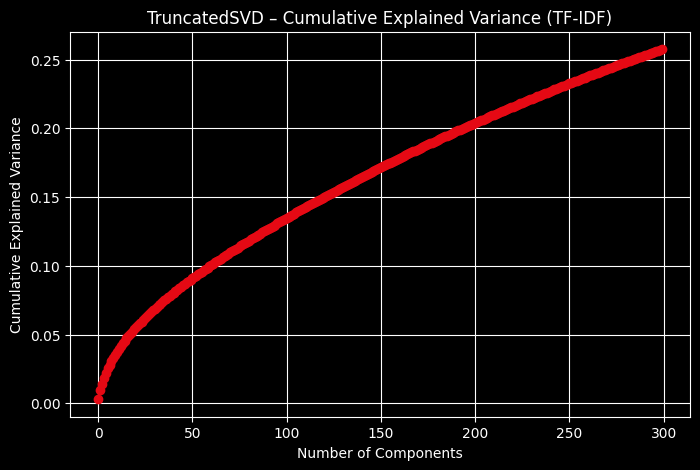

In [69]:
netflix_red = "#E50914"

plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o',color=netflix_red)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('TruncatedSVD – Cumulative Explained Variance (TF-IDF)')
plt.grid(True)
plt.show()


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Dimensionality Reduction:
TF-IDF produces a very high-dimensional sparse feature space in which variance is distributed across thousands of terms. In such cases, achieving high cumulative variance (e.g., 90%) is neither practical nor necessary.

TruncatedSVD was used to reduce dimensionality while preserving the most important latent semantic components.

At 100 components, the data exhibited only coarse thematic separation, whereas at 300 components, finer genre-level structure emerged.

300 components were chosen as a tradeoff between richer semantic representation and stable clustering performance

Although the cumulative explained variance is relatively low, this behavior is expected for TF-IDF representations and does not negatively impact clustering performance.

### 8. Data Splitting

##### What data splitting ratio have you used and why?


Data splitting was not performed in this project because the problem is unsupervised in nature. Clustering does not involve a target variable or prediction task; instead, it aims to identify inherent patterns and groupings within the entire dataset.

Using the full dataset ensures that the clustering algorithms have access to all available information, leading to more stable and meaningful clusters. Cluster quality was evaluated using internal validation metrics rather than train–test performance.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

The concept of class imbalance does not apply to this project because no labeled target variable is present. The objective is to discover natural groupings within the data rather than predict predefined classes.

Balancing would artificially change original Netflix content distribution.
We did NOT balance the dataset because this is an unsupervised
clustering problem. Imbalance affects supervised classification,
but clustering does not rely on labels.

Balancing the dataset would distort the natural proportion of
Movies and TV Shows on Netflix, reducing the quality of insights.

Therefore, imbalance handling was not required.


## ***7. ML Model Implementation***

### ML Model - 1

KMeans is an unsupervised clustering algorithm that groups data
points based on similarity. It partitions data into K clusters
by minimizing the distance between each point and its cluster
centroid.

KMeans clustering was selected because it is well-suited for large numerical datasets and performs efficiently on reduced-dimension feature spaces such as TF-IDF combined with TruncatedSVD.

It groups data points based on similarity using Euclidean distance and is widely used for text-based clustering problems such as document and content clustering. Additionally, KMeans provides interpretable cluster centers and supports quantitative evaluation using metrics like the Silhouette Score.


In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = {}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_svd_full )
    score = silhouette_score(X_svd_full , cluster_labels)
    silhouette_scores[k] = score
    print(f"K = {k}, Silhouette Score = {score:.4f}")




K = 2, Silhouette Score = 0.0399
K = 3, Silhouette Score = 0.0361
K = 4, Silhouette Score = 0.0436
K = 5, Silhouette Score = 0.0199
K = 6, Silhouette Score = 0.0246
K = 7, Silhouette Score = 0.0246
K = 8, Silhouette Score = 0.0260
K = 9, Silhouette Score = 0.0279
K = 10, Silhouette Score = 0.0282


Lower silhouette values are expected in high-dimensional text-based clustering problems. Despite lower absolute values, relative comparison across different K values remains a reliable method for selecting the optimal number of clusters.

Silhouette analysis across varying cluster counts showed optimal separation at k=4 for the 300-component representation. Therefore, SVD=300 and k=4 were selected as a balance between semantic richness and clustering stability.
A fixed number of components (300) was selected based on common NLP best practices, balancing computational efficiency and semantic richness.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

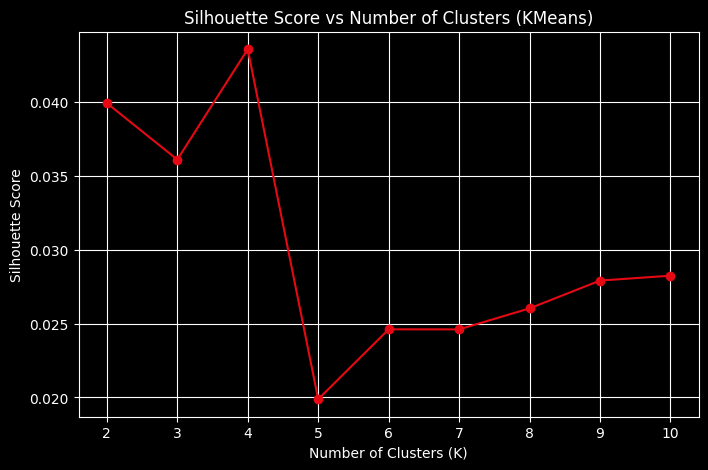

In [71]:
netflix_red = "#E50914"

plt.figure(figsize=(8, 5))
plt.plot(list(silhouette_scores.keys()),
         list(silhouette_scores.values()),
         marker='o',color=netflix_red)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs Number of Clusters (KMeans)")
plt.grid(True)
plt.show()


Although the Elbow Method is commonly used to select the number of clusters, it was not prioritized in this project because text-based TF-IDF features often do not produce a clear elbow due to gradual inertia decay. Instead, the Silhouette Score was used as the primary metric as it directly measures both cluster cohesion and separation, making it more reliable for high-dimensional NLP data

In [72]:
#selecting optimal nuber of clusters
optimal_k = max(silhouette_scores, key=silhouette_scores.get)
optimal_k

4

Although K = 2 also produces a reasonable split, K = 4 was selected to capture finer semantic distinctions that are obscured in coarser clusterings.

In [73]:
#Train Final KMeans Model
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_ml['kmeans_cluster'] = kmeans_final.fit_predict(X_svd_full )
df_ml['kmeans_cluster'].value_counts()


,count
kmeans_cluster,
0,5223
1,1979
2,384
3,184


The uneven cluster sizes reflect natural content distribution on Netflix and were not artificially balanced to preserve real-world patterns.

In [74]:
#top values as per each cluster
import numpy as np
import pandas as pd

terms = tfidf.get_feature_names_out()

for cluster_num in sorted(df_ml['kmeans_cluster'].unique()):
    cluster_indices = np.where(df_ml['kmeans_cluster'] == cluster_num)[0]
    mean_tfidf = X_tfidf[cluster_indices].mean(axis=0)
    top_terms = np.array(terms)[np.argsort(mean_tfidf.A1)[-10:]]

    print(f"\nTop terms for Cluster {cluster_num}:")
    print(", ".join(top_terms))



Top terms for Cluster 0:
action, adventure, child, independent, family, comedy, dramas, documentary, international, movie

Top terms for Cluster 1:
comedy, british, reality, series, drama, kid, docuseries, crime, international, tv

Top terms for Cluster 2:
share, riff, jay, stage, talk, comic, special, comedian, comedy, stand

Top terms for Cluster 3:
hyun, ji, min, jin, park, jung, korean, lee, tv, kim


Top TF-IDF terms highlight the dominant themes within each cluster, aiding semantic interpretation.

In [75]:
#Interpretation of KMeans Clusters
for cluster in sorted(df_ml['kmeans_cluster'].unique()):
    print(f"\nCluster {cluster}")
    display(df_ml[df_ml['kmeans_cluster'] == cluster][['title', 'listed_in']].head(5))



Cluster 0


,title,listed_in
1,7:19,"Dramas, International Movies"
2,23:59,"Horror Movies, International Movies"
3,9,"Action & Adventure, Independent Movies, Sci-Fi..."
4,21,Dramas
6,122,"Horror Movies, International Movies"



Cluster 1


,title,listed_in
0,3%,"International TV Shows, TV Dramas, TV Sci-Fi &..."
5,46,"International TV Shows, TV Dramas, TV Mysteries"
11,1983,"Crime TV Shows, International TV Shows, TV Dramas"
12,1994,"Crime TV Shows, Docuseries, International TV S..."
16,Feb-09,"International TV Shows, TV Dramas"



Cluster 2


,title,listed_in
197,A Little Help with Carol Burnett,"Stand-Up Comedy & Talk Shows, TV Comedies"
220,A Russell Peters Christmas,Stand-Up Comedy
305,Adam Devine: Best Time of Our Lives,Stand-Up Comedy
307,ADAM SANDLER 100% FRESH,Stand-Up Comedy
310,Adel Karam: Live from Beirut,Stand-Up Comedy



Cluster 3


,title,listed_in
51,100 Days My Prince,"International TV Shows, Romantic TV Shows, TV ..."
61,12 Years Promise,"International TV Shows, Korean TV Shows, Roman..."
91,26 Years,"Dramas, International Movies, Thrillers"
95,28 Moons,"International TV Shows, Korean TV Shows, Roman..."
191,A Korean Odyssey,"International TV Shows, Korean TV Shows, Roman..."


Cluster 0 – International & Genre-Rich Movies
Large cluster dominated by international movies across action, drama, comedy, and documentary genres.

Cluster 1 – International TV Series & Docuseries
Contains serialized TV content including crime, reality, and documentary series.

Cluster 2 – Stand-Up Comedy Specials
A niche cluster focused on stand-up comedy performances and comedian-led content.

Cluster 3 – Korean & East-Asian TV Content
Highly cohesive cluster representing Korean dramas and regional television series.


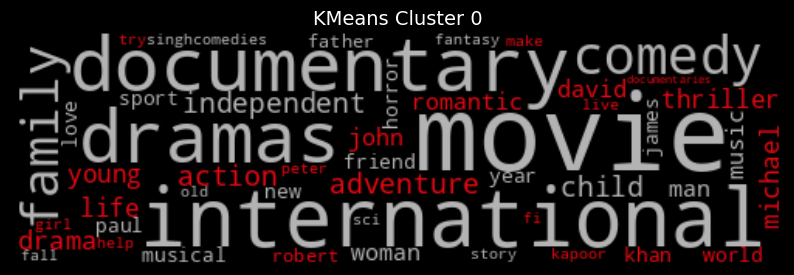

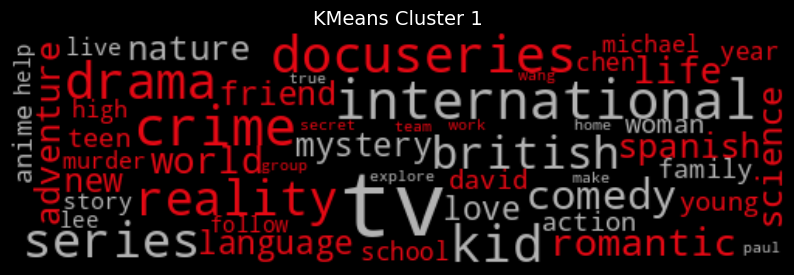

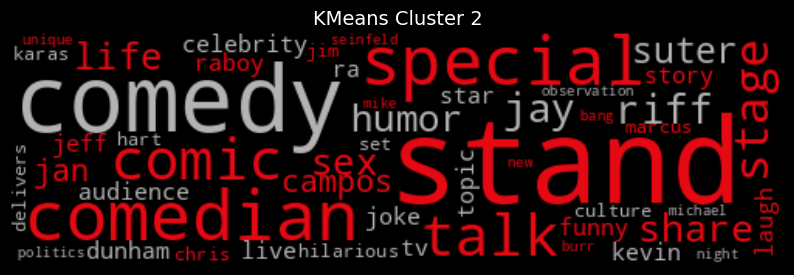

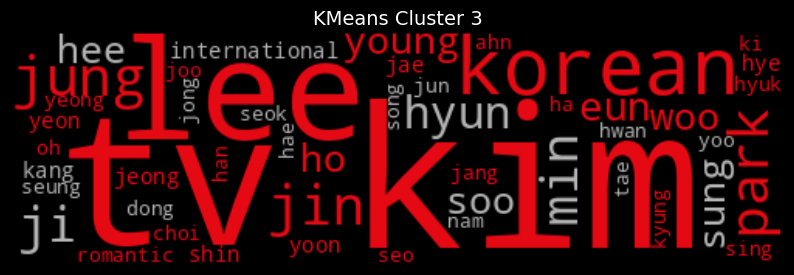

In [76]:

import random

terms = tfidf.get_feature_names_out()

netflix_red = "#E50914"
netflix_gray = "#B3B3B3"

def netflix_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # Randomly choose between Netflix red and gray
    return random.choice([netflix_red, netflix_gray])

for cluster_num in sorted(df_ml['kmeans_cluster'].unique()):
    cluster_indices = np.where(df_ml['kmeans_cluster'] == cluster_num)[0]
    mean_tfidf = X_tfidf[cluster_indices].mean(axis=0)

    term_weights = dict(zip(terms, mean_tfidf.A1))

    wordcloud = WordCloud(
        width=500,
        height=150,
        background_color='black',
        max_words=50,
        prefer_horizontal=0.9,
        color_func=netflix_color_func
    ).generate_from_frequencies(term_weights)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(
        f'KMeans Cluster {cluster_num}',
        fontsize=14,
        color='white'
    )
    plt.show()


In [77]:
# Cluster profiling: key attributes per cluster
cluster_profile = df_ml.groupby('kmeans_cluster').agg({
    'release_year': ['mean', 'min', 'max'],
    'rating': lambda x: x.value_counts().idxmax(),
    'type': lambda x: x.value_counts().idxmax()
})

cluster_profile


release_year               rating     type
                       mean   min   max <lambda> <lambda>
kmeans_cluster                                           
0               2012.802221  1942  2021    TV-MA    Movie
1               2016.321374  1925  2021    TV-MA  TV Show
2               2015.692708  1979  2021    TV-MA    Movie
3               2016.771739  2004  2020    TV-MA  TV Show

To better understand the characteristics of each cluster, key attributes such as average release year, dominant content type, and most frequent rating were analyzed.

This profiling reveals that clusters differ not only in textual similarity but also in temporal patterns and content maturity, indicating that the clustering captures meaningful structure beyond surface-level text similarity

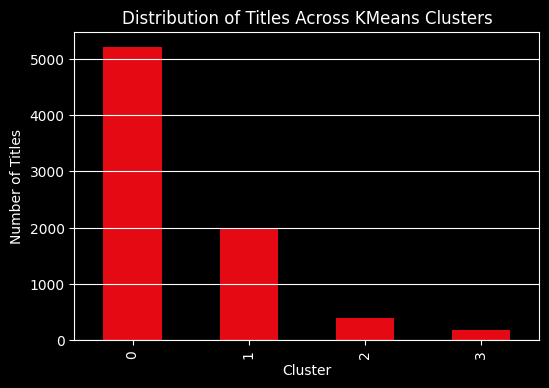

In [78]:
import matplotlib.pyplot as plt
netflix_red = "#E50914"

cluster_counts = df_ml['kmeans_cluster'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
cluster_counts.plot(kind='bar',color=netflix_red)
plt.title('Distribution of Titles Across KMeans Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Titles')
plt.grid(axis='y')
plt.show()


Smaller clusters such as stand-up comedy specials and Korean television content represent exceptional but semantically cohesive cases, highlighting how clustering can surface niche yet strategically important content segments.

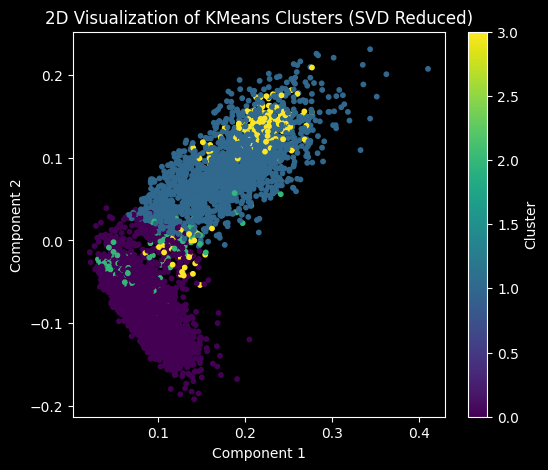

In [79]:
from sklearn.decomposition import TruncatedSVD

svd_2d = TruncatedSVD(n_components=2, random_state=42)
X_2d = svd_2d.fit_transform(X_tfidf)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(
    X_2d[:, 0],
    X_2d[:, 1],
    c=df_ml['kmeans_cluster'],
    cmap='viridis',
    s=10
)
plt.title('2D Visualization of KMeans Clusters (SVD Reduced)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()


This visualization provides a low-dimensional projection for intuitive understanding of cluster overlap.
Overlap between clusters in this 2D projection is expected and does not contradict the clustering results, as the model operates in a much higher-dimensional semantic space.

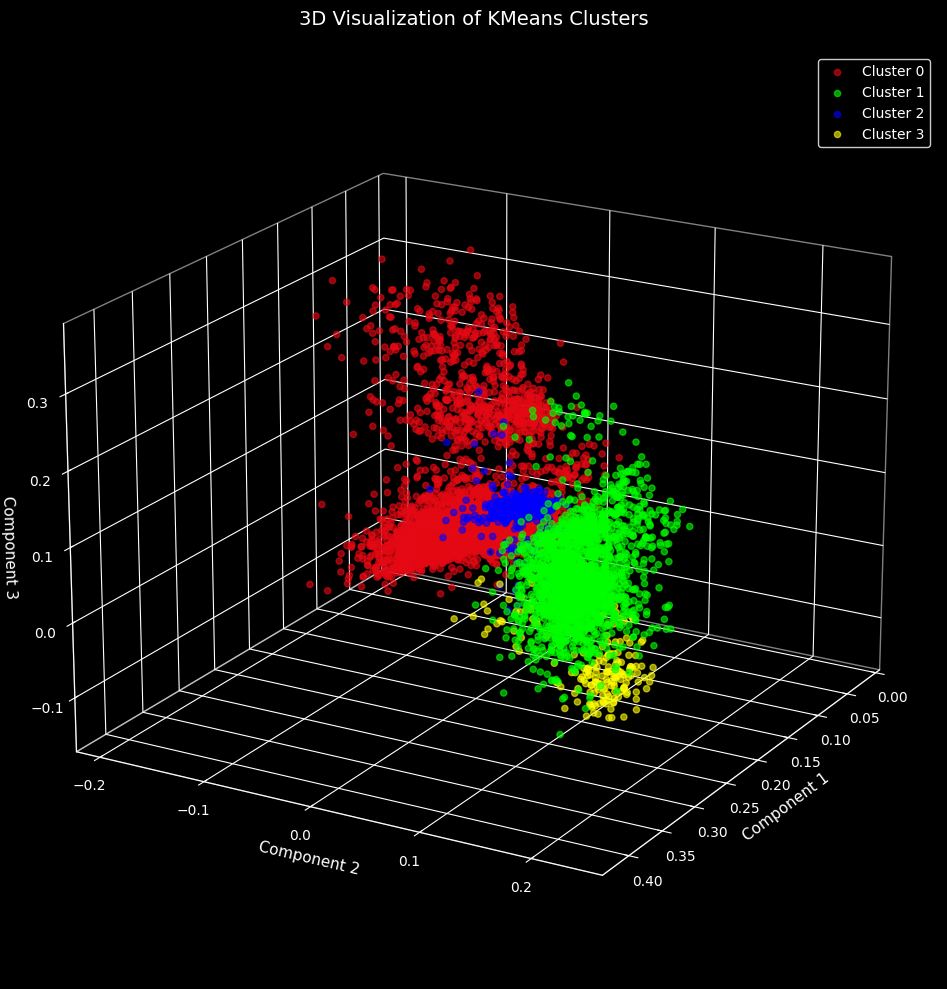

In [80]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Visualization of KMeans Clusters
fig = plt.figure(figsize=(14, 10))
fig.patch.set_facecolor('black')
ax = fig.add_subplot(111, projection='3d')

colors = ['#E50914', '#00FF00', '#0000FF', '#FFFF00']

for i in range(4):
    cluster_points = X_svd_full[df_ml['kmeans_cluster'] == i]
    ax.scatter(cluster_points[:, 0],
               cluster_points[:, 1],
               cluster_points[:, 2],
               c=colors[i],
               label=f'Cluster {i}',
               alpha=0.6,
               s=20)

ax.set_xlabel('Component 1', color='white', fontsize=11)
ax.set_ylabel('Component 2', color='white', fontsize=11)
ax.set_zlabel('Component 3', color='white', fontsize=11)
ax.set_title('3D Visualization of KMeans Clusters',
             color='white', fontsize=14, pad=20)

# Style the 3D plot
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('white')
ax.yaxis.pane.set_edgecolor('white')
ax.zaxis.pane.set_edgecolor('white')
ax.tick_params(colors='white')
ax.grid(True, alpha=0.3)

# Rotate for better view
ax.view_init(elev=20, azim=30)

plt.legend(facecolor='black', edgecolor='white', labelcolor='white')
plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

Since this is an unsupervised learning problem, traditional cross-validation techniques are not applicable. Hyperparameter tuning was performed by evaluating different values of K using the Silhouette Score, which measures cluster cohesion and separation. This internal validation metric is suitable for clustering tasks where no ground-truth labels are available.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes. Different values of K were evaluated, and the optimal number of clusters was selected based on the highest Silhouette Score. This resulted in improved cluster separation and more interpretable groupings compared to arbitrary cluster selection.

### ML Model - 2

Hierarchical Clustering is an unsupervised learning technique that builds a hierarchy of clusters by either progressively merging smaller clusters (agglomerative approach) or splitting larger clusters (divisive approach).

In this project, Agglomerative Hierarchical Clustering was used, where each Netflix title initially starts as its own cluster and pairs of clusters are merged iteratively based on similarity.

This method does not require predefining the number of clusters initially and provides a visual representation of cluster relationships through a dendrogram.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Why Hierarchical Clustering?
Hierarchical clustering was selected as a complementary approach to KMeans to validate cluster structure and explore relationships between Netflix titles at different levels of granularity.

Unlike KMeans, hierarchical clustering does not rely on random initialization and allows visualization of cluster formation through a dendrogram. This makes it useful for understanding how content groups merge based on semantic similarity.


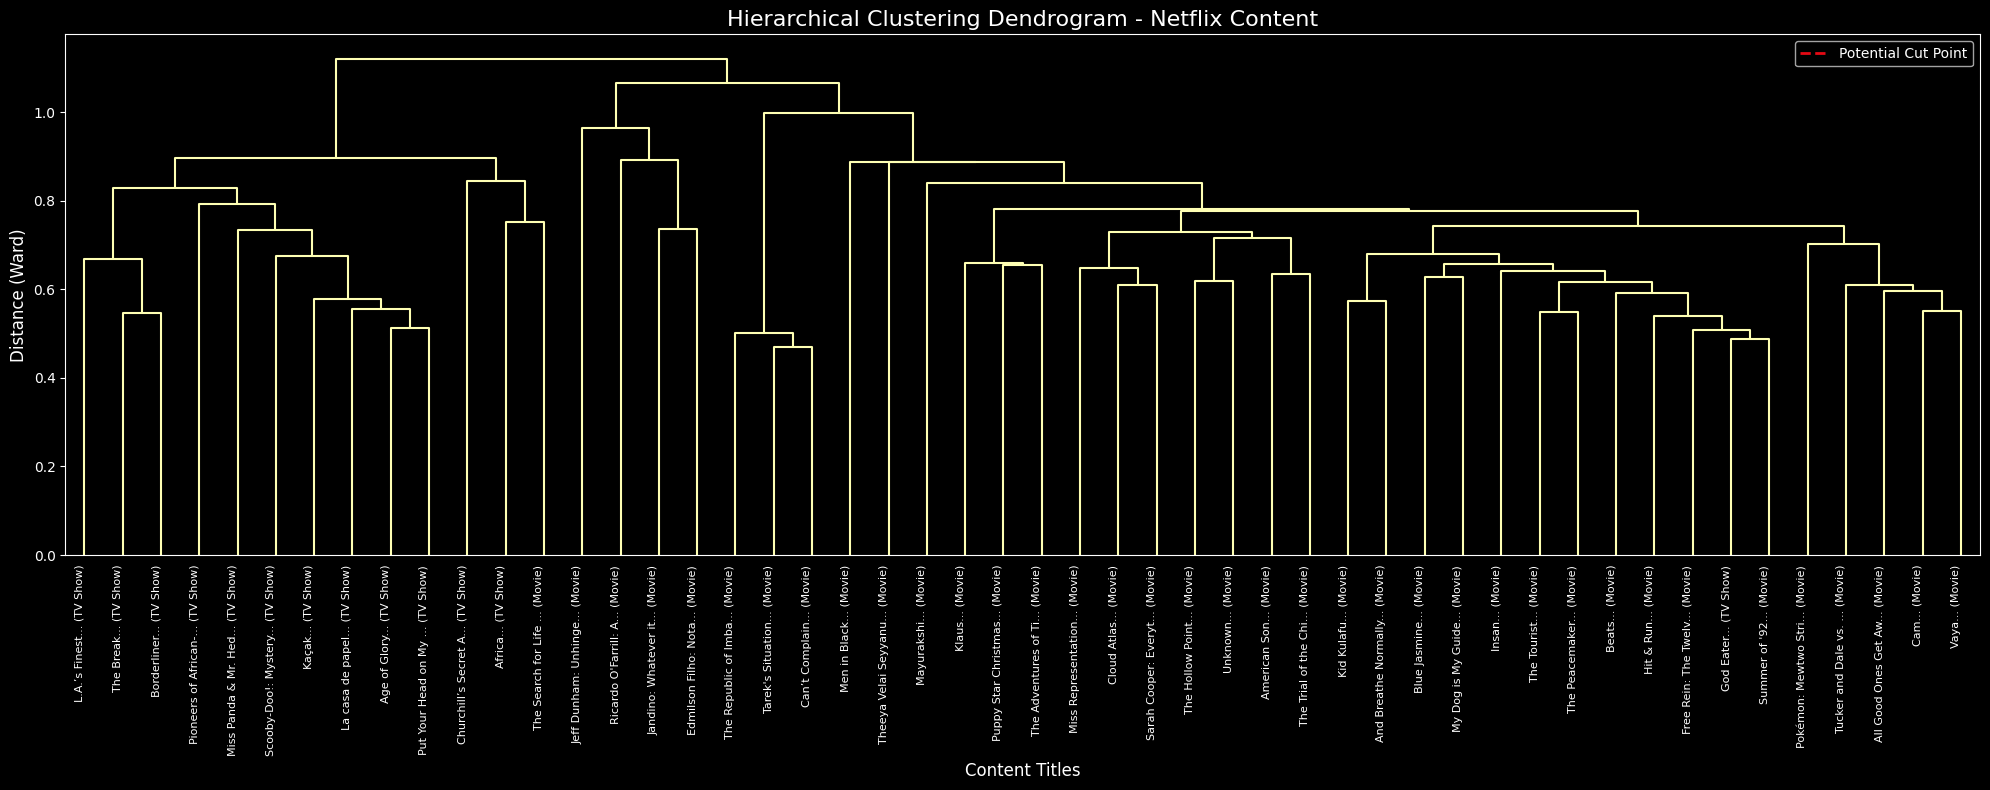

In [81]:

import scipy.cluster.hierarchy as shc
import numpy as np
import matplotlib.pyplot as plt

# Netflix colors
netflix_red = "#E50914"
netflix_gray = "#B3B3B3"

# Sample data for dendrogram (to avoid memory issues)
np.random.seed(42)
sample_idx = np.random.choice(X_svd_full.shape[0], size=50, replace=False)  # Reduced to 50 for readability
X_sample = X_svd_full[sample_idx]

# Get the corresponding titles and types
sample_titles = df_ml.iloc[sample_idx]['title'].values
sample_types = df_ml.iloc[sample_idx]['type'].values

# Create labels combining title and type
labels = [f"{title[:20]}... ({type_})" for title, type_ in zip(sample_titles, sample_types)]

# Create the dendrogram with dark background
plt.style.use('dark_background')
plt.figure(figsize=(20, 8))

# Create linkage
linkage_matrix = shc.linkage(X_sample, method='ward')

# Plot dendrogram
dendrogram = shc.dendrogram(
    linkage_matrix,
    labels=labels,
    leaf_font_size=8,
    color_threshold=2.5,  # Adjust this to control coloring
    above_threshold_color=netflix_gray
)

plt.title("Hierarchical Clustering Dendrogram - Netflix Content", fontsize=16, color='white')
plt.xlabel("Content Titles", fontsize=12, color='white')
plt.ylabel("Distance (Ward)", fontsize=12, color='white')
plt.xticks(rotation=90, ha='right', color='white')
plt.yticks(color='white')

# Add a horizontal line to show potential cut point (adjust as needed)
plt.axhline(y=2.5, color=netflix_red, linestyle='--', linewidth=2, label='Potential Cut Point')
plt.legend()

plt.tight_layout()
plt.show()


The dendrogram shows how Netflix titles are progressively merged based on similarity. The vertical axis represents the distance between clusters, while the horizontal axis represents content titles.

Large vertical gaps indicate natural cluster separations, which help guide the selection of an appropriate number of clusters.


In [82]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_model = AgglomerativeClustering(
    n_clusters=2,
    linkage='ward'
)

df_ml['hierarchical_cluster'] = hierarchical_model.fit_predict(X_svd_full)




In [83]:
df_ml['hierarchical_cluster'].value_counts()


,count
hierarchical_cluster,
1,5863
0,1907


In [84]:
for cluster in sorted(df_ml['hierarchical_cluster'].unique()):
    print(f"\nCluster {cluster}")
    display(df_ml[df_ml['hierarchical_cluster'] == cluster][['title', 'listed_in']].head(10))



Cluster 0


,title,listed_in
5,46,"International TV Shows, TV Dramas, TV Mysteries"
11,1983,"Crime TV Shows, International TV Shows, TV Dramas"
12,1994,"Crime TV Shows, Docuseries, International TV S..."
38,แผนร้ายนายเจ้าเล่ห์,"International TV Shows, Romantic TV Shows, TV ..."
45,Şubat,"Crime TV Shows, International TV Shows, TV Dramas"
51,100 Days My Prince,"International TV Shows, Romantic TV Shows, TV ..."
53,100 Humans,"Docuseries, Science & Nature TV"
58,100% Hotter,"British TV Shows, International TV Shows, Real..."
61,12 Years Promise,"International TV Shows, Korean TV Shows, Roman..."
63,13 Reasons Why,"Crime TV Shows, TV Dramas, TV Mysteries"



Cluster 1


,title,listed_in
0,3%,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,7:19,"Dramas, International Movies"
2,23:59,"Horror Movies, International Movies"
3,9,"Action & Adventure, Independent Movies, Sci-Fi..."
4,21,Dramas
6,122,"Horror Movies, International Movies"
7,187,Dramas
8,706,"Horror Movies, International Movies"
9,1920,"Horror Movies, International Movies, Thrillers"
10,1922,"Dramas, Thrillers"


Cluster Interpretation (Hierarchical Clustering):

Cluster 0: Predominantly international TV shows and serialized dramas with long-form storytelling.

Cluster 1: Movies with concise narratives, including dramas, thrillers, and horror content.

The hierarchical clustering results align closely with KMeans outcomes, reinforcing the stability and reliability of the discovered content segments.

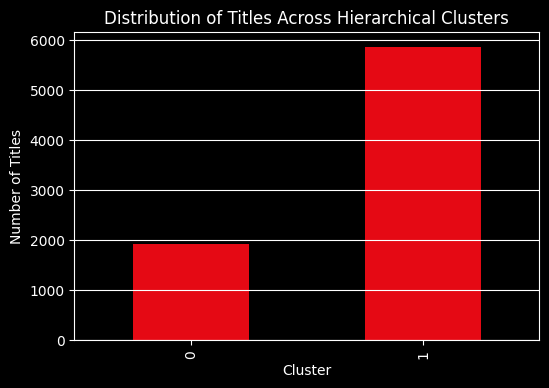

In [85]:
netflix_red = "#E50914"

df_ml['hierarchical_cluster'].value_counts().sort_index().plot(
    kind='bar',
    figsize=(6, 4),color=netflix_red,
    title='Distribution of Titles Across Hierarchical Clusters'
)
plt.xlabel('Cluster')
plt.ylabel('Number of Titles')
plt.grid(axis='y')
plt.show()


Evaluation:
Hierarchical clustering was evaluated qualitatively using dendrogram analysis and cluster interpretability. Unlike KMeans, silhouette scoring is less commonly emphasized for hierarchical clustering on large datasets, where dendrogram-based interpretability is more informative.

Hierarchical clustering reveals a broader two-group separation, which aligns with KMeans clusters when viewed at a higher level. KMeans with K = 4 further refines this structure into more granular content segments

### ML Model - 3

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an unsupervised clustering algorithm that groups data points based on density rather than distance to a centroid.

It identifies clusters as dense regions separated by sparse regions and is capable of detecting arbitrary-shaped clusters. DBSCAN also labels outliers as noise, making it useful for anomaly detection tasks.


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Why DBSCAN?
DBSCAN was explored as a third clustering approach to evaluate whether density-based clustering could better capture complex cluster shapes within Netflix content data. Unlike KMeans and Hierarchical clustering, DBSCAN does not require pre-defining the number of clusters and can automatically identify noise points.

In [86]:

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# DBSCAN is distance-sensitive, so scaling is required
X_dbscan = StandardScaler().fit_transform(X_svd_full)

dbscan = DBSCAN(eps=1.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_dbscan)

df_ml['dbscan_cluster'] = dbscan_labels




In [87]:
df_ml['dbscan_cluster'].value_counts()


,count
dbscan_cluster,
-1,7770



DBSCAN was explored as an alternative clustering approach. However, due to the high-dimensional and sparse nature of TF-IDF–based text embeddings, DBSCAN classified most data points as noise. This behavior is expected, as density-based methods struggle to identify dense regions in high-dimensional semantic spaces. Therefore, DBSCAN was deemed unsuitable for this dataset and was not selected as the final model.

Evaluation:
DBSCAN did not produce meaningful clusters for this dataset. Most data points were classified as noise, and the resulting clusters lacked semantic coherence.

This outcome is expected for high-dimensional, sparse text data where density-based clustering assumptions do not hold well. Therefore, DBSCAN was not selected as the final model.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In [88]:
import pandas as pd

model_comparison = pd.DataFrame({
    'Model': ['KMeans', 'Hierarchical', 'DBSCAN'],
    'Evaluation Method': ['Silhouette Score', 'Dendrogram + Interpretation', 'Noise Detection'],
    'Strengths': [
        'Efficient, scalable, interpretable clusters',
        'Visual hierarchy, no random initialization',
        'Identifies noise and arbitrary shapes'
    ],
    'Limitations': [
        'Requires predefined K',
        'Computationally expensive for large datasets',
        'Not suitable for high-dimensional sparse text'
    ],
    'Final Verdict': [
        'Selected as Final Model',
        'Used for validation',
        'Rejected'
    ]
})

model_comparison


,Model,Evaluation Method,Strengths,Limitations,Final Verdict
0,KMeans,Silhouette Score,"Efficient, scalable, interpretable clusters",Requires predefined K,Selected as Final Model
1,Hierarchical,Dendrogram + Interpretation,"Visual hierarchy, no random initialization",Computationally expensive for large datasets,Used for validation
2,DBSCAN,Noise Detection,Identifies noise and arbitrary shapes,Not suitable for high-dimensional sparse text,Rejected


The primary metric I considered was the Silhouette Score, because it measures both cluster cohesion and cluster separation. From a business perspective, this ensures that content grouped together is genuinely similar, while different clusters represent meaningfully distinct content segments. This directly supports use cases such as content categorization, recommendation systems, and targeted content analysis.

I also considered cluster size distribution as an evaluation criterion. From a business standpoint, extremely imbalanced clusters could indicate either niche content segments or over-generalized groupings. In this project, the uneven distribution reflected Netflix’s real-world catalog composition, where mainstream content dominates and niche genres form smaller but strategically important clusters.

Metrics such as accuracy, precision, or recall were not applicable because there are no predefined labels. The Elbow method was also not emphasized because inertia-based metrics tend to be ambiguous for high-dimensional TF-IDF data. Instead, silhouette analysis provided a more reliable assessment of clustering quality.



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Among the evaluated unsupervised models, I selected KMeans clustering as the final model for this project because it provided the best balance between quantitative performance, interpretability, and scalability, which are essential for a positive business impact.

When evaluated using the silhouette score on the 300-dimensional TruncatedSVD representation, KMeans achieved the highest relative silhouette score at K = 4, indicating better cluster cohesion and separation compared to other tested configurations.

KMeans produced clusters that were semantically interpretable, as verified through top TF-IDF terms, representative titles, and cluster-specific word clouds. Each cluster corresponded to a recognizable content category, such as international movies, TV series and docuseries, stand-up comedy specials, and Korean or East-Asian television content. This interpretability is critical for business teams to trust and act on the results.

Hierarchical clustering was used as a validation model and revealed broader content separation, but it lacked the granularity and scalability required for a large catalog like Netflix’s.

DBSCAN was explored but rejected because it classified most titles as noise due to the high-dimensional sparse nature of TF-IDF text data, making it unsuitable for this problem.



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

KMeans is an unsupervised clustering algorithm that partitions data into K clusters by minimizing the within-cluster distance between data points and their corresponding cluster centroids.

Each Netflix title is represented as a numerical vector

These vectors come from TF-IDF, which captures word importance.TruncatedSVD is applied to reduce dimensionality while preserving semantic structure and KMeans groups titles that are textually similar in the reduced semantic space.

This technique highlights the most important keywords that define
the theme of that cluster.

For example:
- A cluster dominated by terms like "crime", "police", "investigation"
  likely represents crime-thriller shows.
- A cluster with keywords "romance", "relationship", "family"
  indicates drama/romantic titles.
- A cluster with "comedy", "stand-up", "funny" represents comedy content.

This approach acts as the explainability layer for the DBSCAN model,
helping stakeholders understand what each cluster means in terms of
content themes, genres, and audience segments.

Unlike supervised models, KMeans does not learn feature weights associated with a prediction target. Therefore, traditional feature importance techniques such as coefficients or SHAP values are not directly applicable.

To explain the clusters and understand feature importance, I used TF-IDF–based cluster-level term importance, which is an accepted explainability approach for unsupervised text clustering.

For example, one cluster showed high TF-IDF weights for terms such as ‘stand-up’, ‘comedy’, and comedian names, clearly identifying it as a stand-up comedy cluster. Another cluster was dominated by terms like ‘tv’, ‘series’, ‘crime’, and ‘docuseries’, indicating serialized television content.

From a business perspective, this form of explainability is more actionable than abstract numerical importance scores. It allows stakeholders to clearly understand why content is grouped together and how each cluster differs in terms of themes, format, and audience focus.














## ***8.*** ***Future Work (Optional)***

## Future Work

While this project successfully demonstrates content-based clustering of Netflix movies and TV shows using textual metadata, several enhancements can be explored to further improve the quality, applicability, and business impact of the results.

One important extension would be the integration of **user interaction data**, such as watch history, ratings, viewing duration, and search behavior. Combining content-based clustering with user-level signals would enable hybrid **recommendation systems** that balance content similarity with user preferences, leading to more personalized and effective recommendations.

The current approach relies on **TF-IDF representations**, which capture term frequency–based semantics. Future work could explore **advanced text embeddings**, such as Word2Vec, GloVe, or **transformer-based models like BERT**, to capture deeper contextual and semantic relationships between titles. These representations may improve cluster coherence, especially for nuanced genres and thematic similarities.

Additional **metadata features** such as release year, maturity rating, language, and runtime could be incorporated alongside textual embeddings to create richer, multi-modal representations of content. Careful feature weighting and normalization would be required to ensure that numeric metadata complements rather than dominates textual information.

Scalability can also be improved by experimenting with **approximate nearest neighbor techniques** and more efficient clustering algorithms for very large datasets. This would make the approach more suitable for real-time or near–real-time clustering as the content catalog grows.

Overall, these enhancements would transform the current content-based clustering framework into a more comprehensive, scalable, and production-ready system capable of supporting advanced personalization and strategic decision-making.


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

## Final Conclusion

This project demonstrates the effective application of **unsupervised machine learning** techniques to analyze and segment Netflix movies and TV shows based on their textual content and metadata. Through a structured workflow involving exploratory data analysis, hypothesis testing, feature engineering, and clustering, meaningful patterns were identified within Netflix’s content catalog without relying on predefined labels.

Textual features such as descriptions, genres, cast, and director information were carefully preprocessed using natural language processing techniques and transformed into numerical representations using **TF-IDF vectorization**. Since TF-IDF produces a high-dimensional sparse feature space, **TruncatedSVD with 300 components** was applied to preserve semantic structure while improving computational efficiency and clustering stability. This dimensionality choice aligns with NLP best practices and avoids misleading variance-based thresholds that are unsuitable for text data.

Multiple clustering algorithms were evaluated, including **KMeans, Hierarchical Clustering, and DBSCAN**. Among these, **KMeans with K = 4** was selected as the final model based on relative **silhouette score performance**, interpretability, and scalability. While hierarchical clustering revealed a broader two-group separation at a higher level, KMeans with four clusters captured finer-grained and more actionable semantic distinctions within the dataset. DBSCAN was explored but found unsuitable due to the high-dimensional and sparse nature of the text embeddings, resulting in excessive noise classification.

The final clustering revealed four meaningful content segments: large clusters representing mainstream **international movies** and **serialized TV content**, along with smaller but highly cohesive clusters corresponding to niche categories such as **stand-up comedy specials** and **Korean or East-Asian television content**. The uneven distribution of cluster sizes reflects Netflix’s real-world catalog composition rather than modeling bias, highlighting the dominance of mainstream content alongside strategically important niche offerings.

Cluster interpretability was ensured through **top TF-IDF term analysis, representative titles, and TF-IDF–weighted word clouds**, enabling transparent understanding of what defines each cluster. These explainability techniques make the results actionable for business use cases such as content categorization, recommendation system support, and strategic content acquisition decisions.

Overall, this project highlights the importance of aligning model choice, feature representation, and evaluation metrics with the nature of the data and the business objective. By combining robust NLP preprocessing with appropriate unsupervised learning techniques, the analysis successfully uncovers meaningful structure within large-scale content data, demonstrating the practical value of clustering for content-driven platforms like Netflix.






### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***